In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
from pathlib import Path

In [2]:
RANDOM_STATE = 6

### Get to know data

In [3]:
home = Path.cwd().parent
data_dir = home / "data"
notebook_dir = home / "notebooks"

In [4]:
df = pd.read_csv(data_dir / "processed" / "german_credit.csv")
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   checking_account_status              1000 non-null   object
 1   duration_months                      1000 non-null   int64 
 2   credit_history                       1000 non-null   object
 3   purpose                              1000 non-null   object
 4   credit_amount                        1000 non-null   int64 
 5   savings_account_bonds                1000 non-null   object
 6   present_employment_since             1000 non-null   object
 7   installment_rate_pct_of_disp_income  1000 non-null   int64 
 8   personal_status_sex                  1000 non-null   object
 9   other_debtors_guarantors             1000 non-null   object
 10  present_residence_since              1000 non-null   int64 
 11  property                             1000 no

((1000, 21), None)

In [7]:
df.columns

Index(['checking_account_status', 'duration_months', 'credit_history',
       'purpose', 'credit_amount', 'savings_account_bonds',
       'present_employment_since', 'installment_rate_pct_of_disp_income',
       'personal_status_sex', 'other_debtors_guarantors',
       'present_residence_since', 'property', 'age_years',
       'other_installment_plans', 'housing', 'existing_credits_count', 'job',
       'people_liable_for_maintenance', 'telephone', 'foreign_worker',
       'class'],
      dtype='object')

In [9]:
df.loc[:, df.columns != 'class'].sample(3)

,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account_bonds,present_employment_since,installment_rate_pct_of_disp_income,personal_status_sex,other_debtors_guarantors,present_residence_since,property,age_years,other_installment_plans,housing,existing_credits_count,job,people_liable_for_maintenance,telephone,foreign_worker
925,< 0 DM,12,all credits here paid duly,car (new),697,< 100 DM,< 1 year,4,male: single,none,2,car or other,46,bank,own,2,skilled employee/official,1,"yes, registered",yes
497,no checking account,24,critical/other credits exist,furniture/equipment,1585,< 100 DM,4 <= ... < 7 years,4,male: single,none,3,bldg society/life ins.,40,none,own,2,skilled employee/official,1,none,yes
96,no checking account,12,critical/other credits exist,education,2012,unknown/no savings account,4 <= ... < 7 years,4,female: div/sep/married,none,2,car or other,61,none,own,1,skilled employee/official,1,none,yes


In [10]:
df["class"].sample(3)

713    1
670    1
342    1
Name: class, dtype: int64

In [ ]:
df["class"].value_counts(normalize=True)
# 1= good, 2= bad

class
1    0.7
2    0.3
Name: proportion, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["class"]),
    df["class"],
    test_size=0.3,
    random_state=RANDOM_STATE
)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 20), (300, 20), (700,), (300,))

In [6]:
X_train.describe()

,duration_months,credit_amount,installment_rate_pct_of_disp_income,present_residence_since,age_years,existing_credits_count,people_liable_for_maintenance
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,20.831429,3248.827143,2.987143,2.845714,35.634286,1.394286,1.151429
std,12.044036,2826.996900,1.127675,1.112639,11.499852,0.577570,0.358722
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1359.500000,2.000000,2.000000,26.750000,1.000000,1.000000
50%,18.000000,2243.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3977.250000,4.000000,4.000000,42.250000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


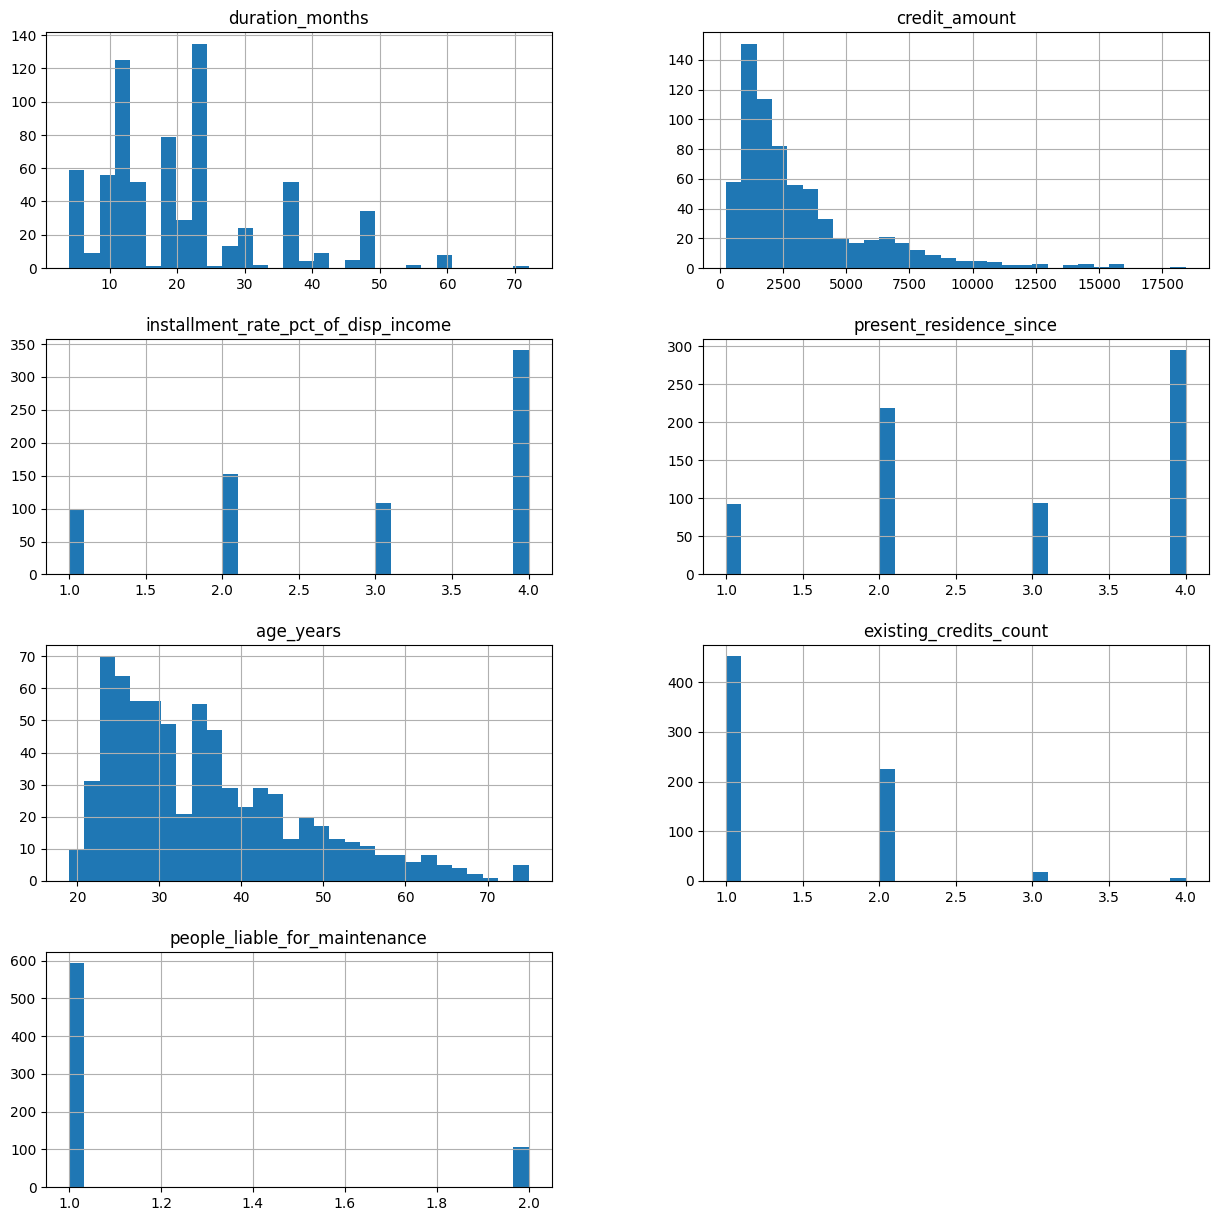

In [31]:
X_train.hist(bins=30, figsize=(15, 15), layout=(4, 2));

In [33]:
X_train.describe(exclude=np.number)

,checking_account_status,credit_history,purpose,savings_account_bonds,present_employment_since,personal_status_sex,other_debtors_guarantors,property,other_installment_plans,housing,job,telephone,foreign_worker
count,700,700,700,700,700,700,700,700,700,700,700,700,700
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,no checking account,existing credits paid duly,radio/television,< 100 DM,1 <= ... < 4 years,male: single,none,car or other,none,own,skilled employee/official,none,yes
freq,278,370,195,427,237,375,637,235,556,504,447,414,675


In [ ]:
def plot_categorical_categorical(contingency, col1, col2):
        """Create heatmap and stacked bar chart for categorical relationships."""
        fig, axes = plt.subplots(2, 1, figsize=(14, 16))
        
        # Heatmap
        sns.heatmap(contingency, annot=True, fmt='d', cmap='YlOrRd', 
                   ax=axes[0], cbar_kws={'label': 'Count'})
        axes[0].set_title(f'Contingency Table: {col1} vs {col2}')
        axes[0].set_xlabel(col2)
        axes[0].set_ylabel(col1)
        
        # Stacked bar chart (proportions)
        contingency_pct = contingency.div(contingency.sum(axis=1), axis=0)
        contingency_pct.plot(kind='bar', stacked=True, ax=axes[1], 
                           colormap='viridis', alpha=0.8)
        axes[1].set_title(f'Proportional Distribution')
        axes[1].set_xlabel(col1)
        axes[1].set_ylabel('Proportion')
        axes[1].legend(title=col2, bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.show()

### Categorical Variables

Column: checking_account_status
checking_account_status
no checking account           0.397143
< 0 DM                        0.271429
0 <= ... < 200 DM             0.270000
>= 200 DM / salary assign.    0.061429
Name: proportion, dtype: float64




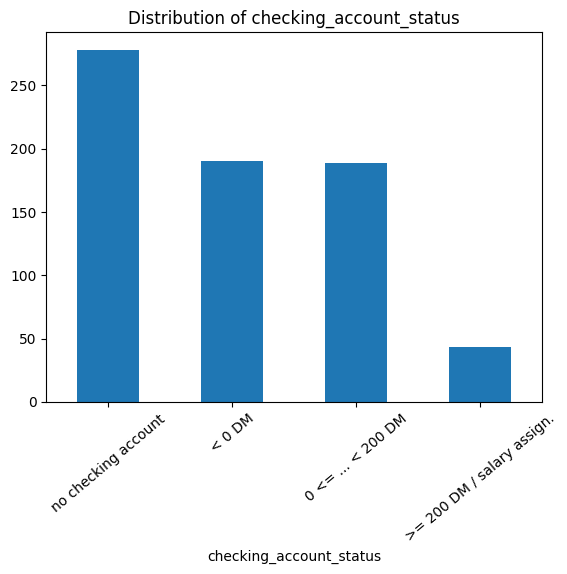

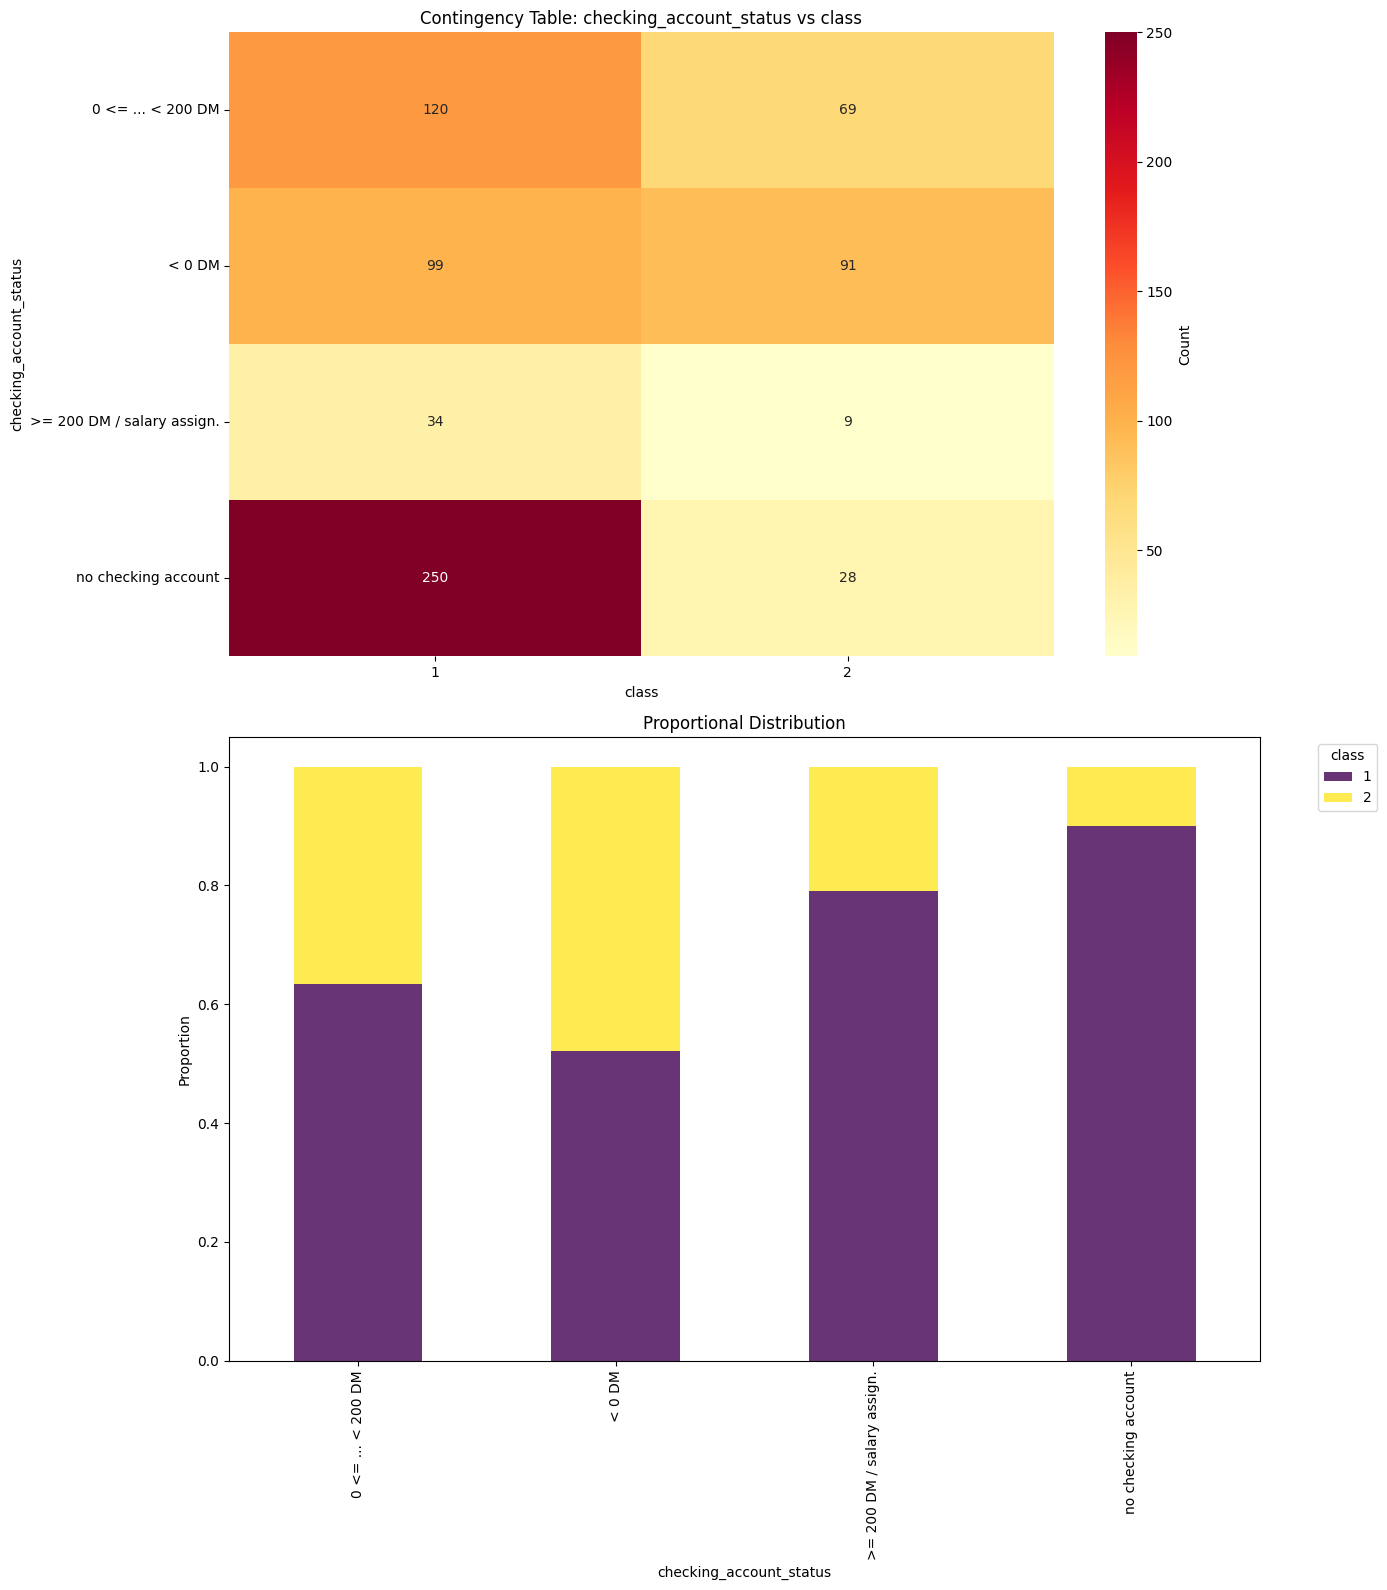




CREDIT RISK VARIABLE ANALYSIS: checking_account_status

📊 CONTINGENCY TABLE (Rows=Categories, Cols=Credit Quality):
   1=Good Credit, 2=Bad Credit
class                         1   2
checking_account_status            
0 <= ... < 200 DM           120  69
< 0 DM                       99  91
>= 200 DM / salary assign.   34   9
no checking account         250  28

📈 BAD CREDIT RATES BY CATEGORY:
   0 <= ... < 200 DM: 36.5% bad credit | 63.5% good credit
   < 0 DM: 47.9% bad credit | 52.1% good credit
   >= 200 DM / salary assign.: 20.9% bad credit | 79.1% good credit
   no checking account: 10.1% bad credit | 89.9% good credit

🔍 CHI-SQUARE TEST RESULTS:
   Chi-square statistic: 89.1927
   P-value: 0.000000
   Degrees of freedom: 3
   Significant at α=0.05: YES

💪 CRAMÉR'S V RESULTS:
   Cramér's V: 0.3570
   Bias-corrected V: 0.3511
   Strength: Large association (0.3-0.4) - Strong predictor

📋 CREDIT RISK INTERPRETATION:
   SIGNIFICANT relationship detected (p=0.000000). The categoric

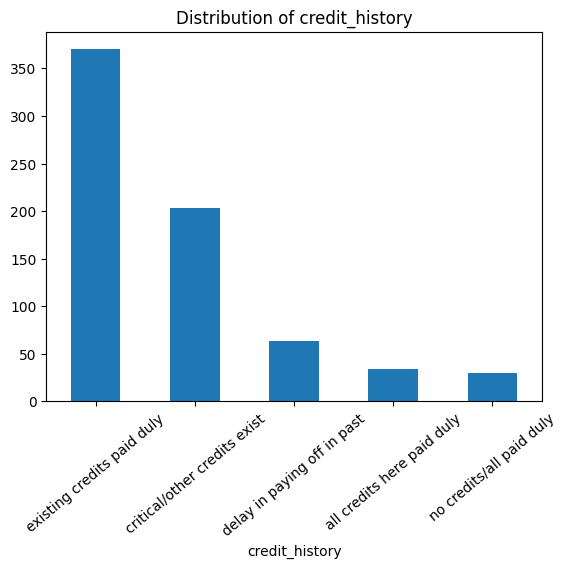

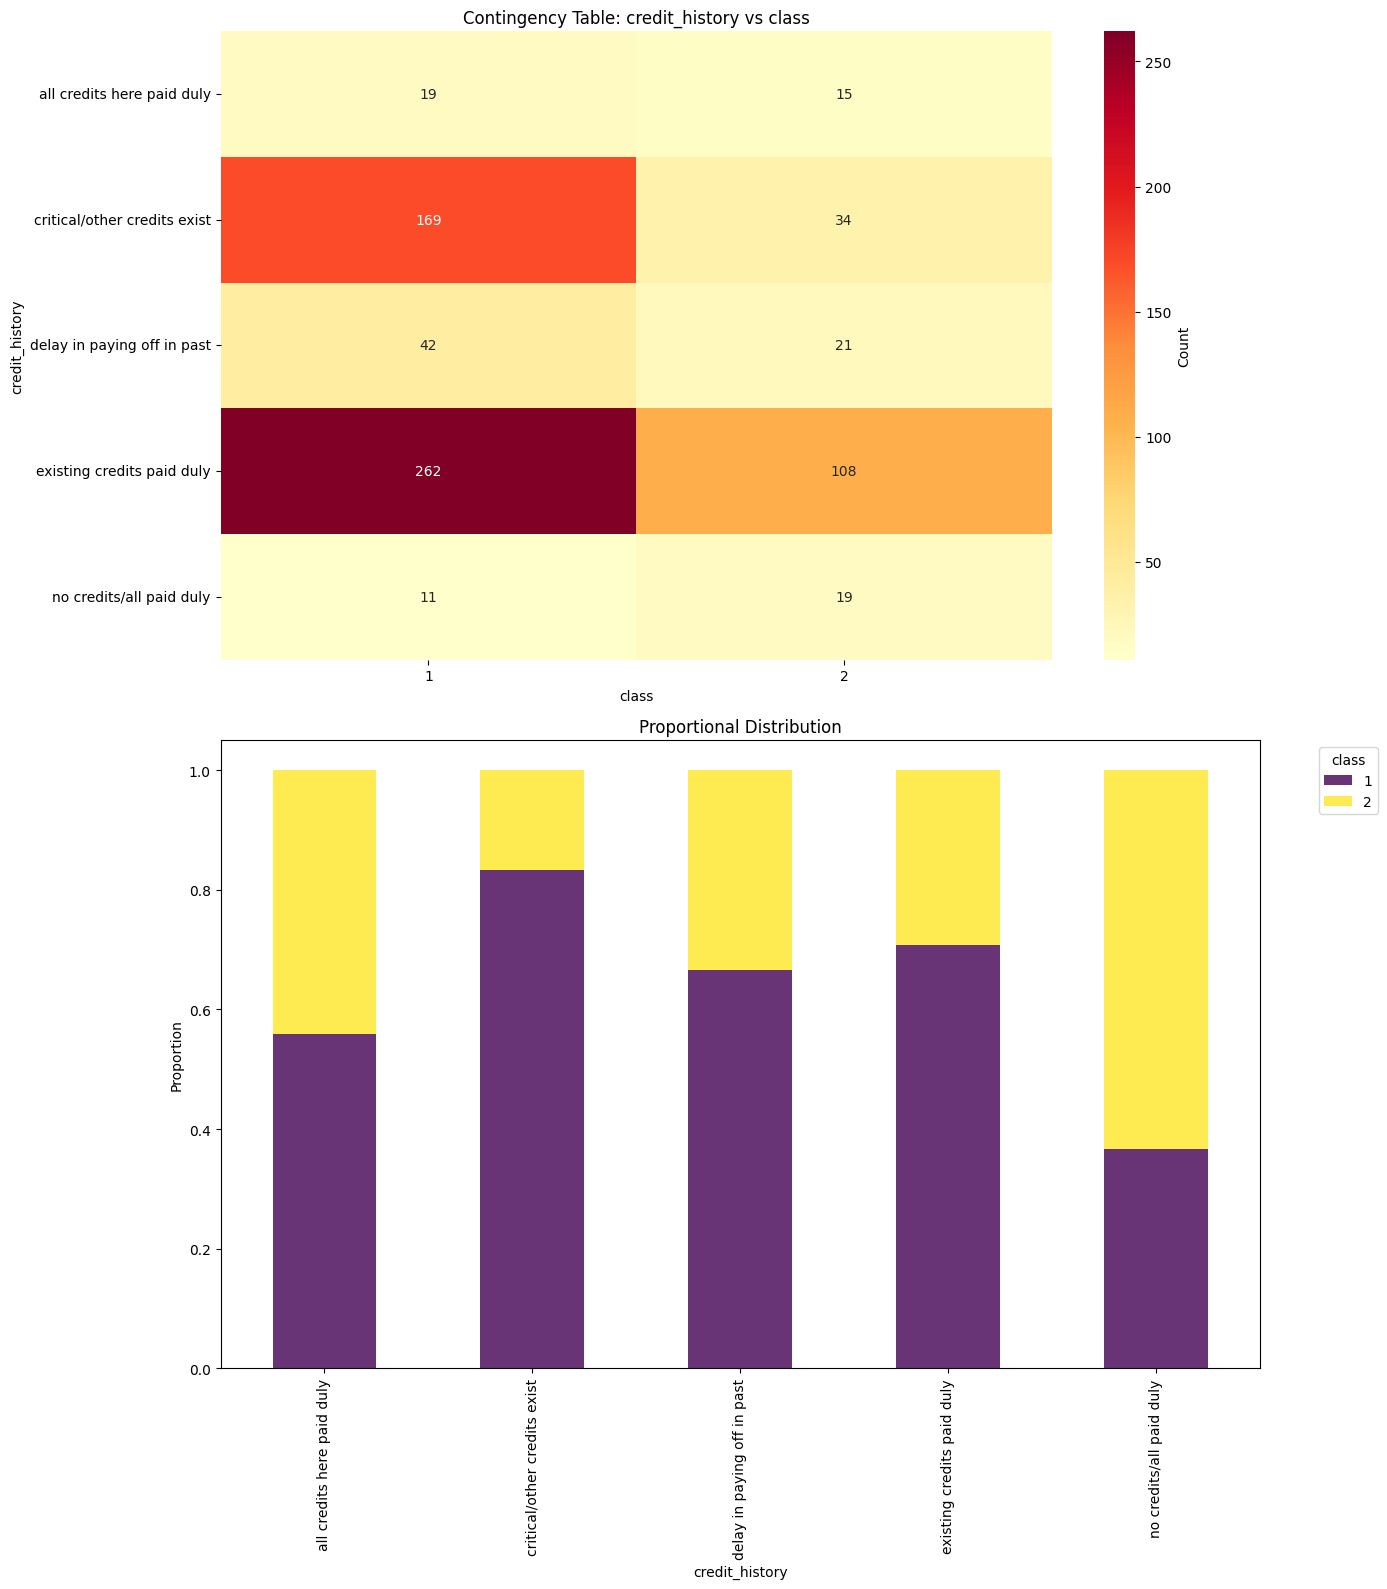




CREDIT RISK VARIABLE ANALYSIS: credit_history

📊 CONTINGENCY TABLE (Rows=Categories, Cols=Credit Quality):
   1=Good Credit, 2=Bad Credit
class                           1    2
credit_history                        
all credits here paid duly     19   15
critical/other credits exist  169   34
delay in paying off in past    42   21
existing credits paid duly    262  108
no credits/all paid duly       11   19

📈 BAD CREDIT RATES BY CATEGORY:
   all credits here paid duly: 44.1% bad credit | 55.9% good credit
   critical/other credits exist: 16.7% bad credit | 83.3% good credit
   delay in paying off in past: 33.3% bad credit | 66.7% good credit
   existing credits paid duly: 29.2% bad credit | 70.8% good credit
   no credits/all paid duly: 63.3% bad credit | 36.7% good credit

🔍 CHI-SQUARE TEST RESULTS:
   Chi-square statistic: 36.7333
   P-value: 0.000000
   Degrees of freedom: 4
   Significant at α=0.05: YES

💪 CRAMÉR'S V RESULTS:
   Cramér's V: 0.2291
   Bias-corrected V: 0.2164
  

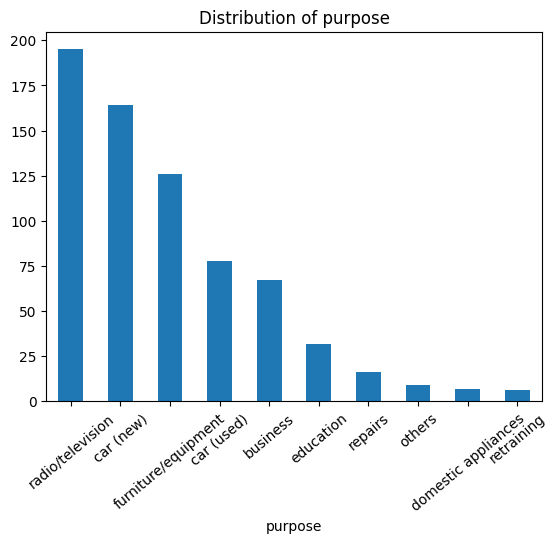

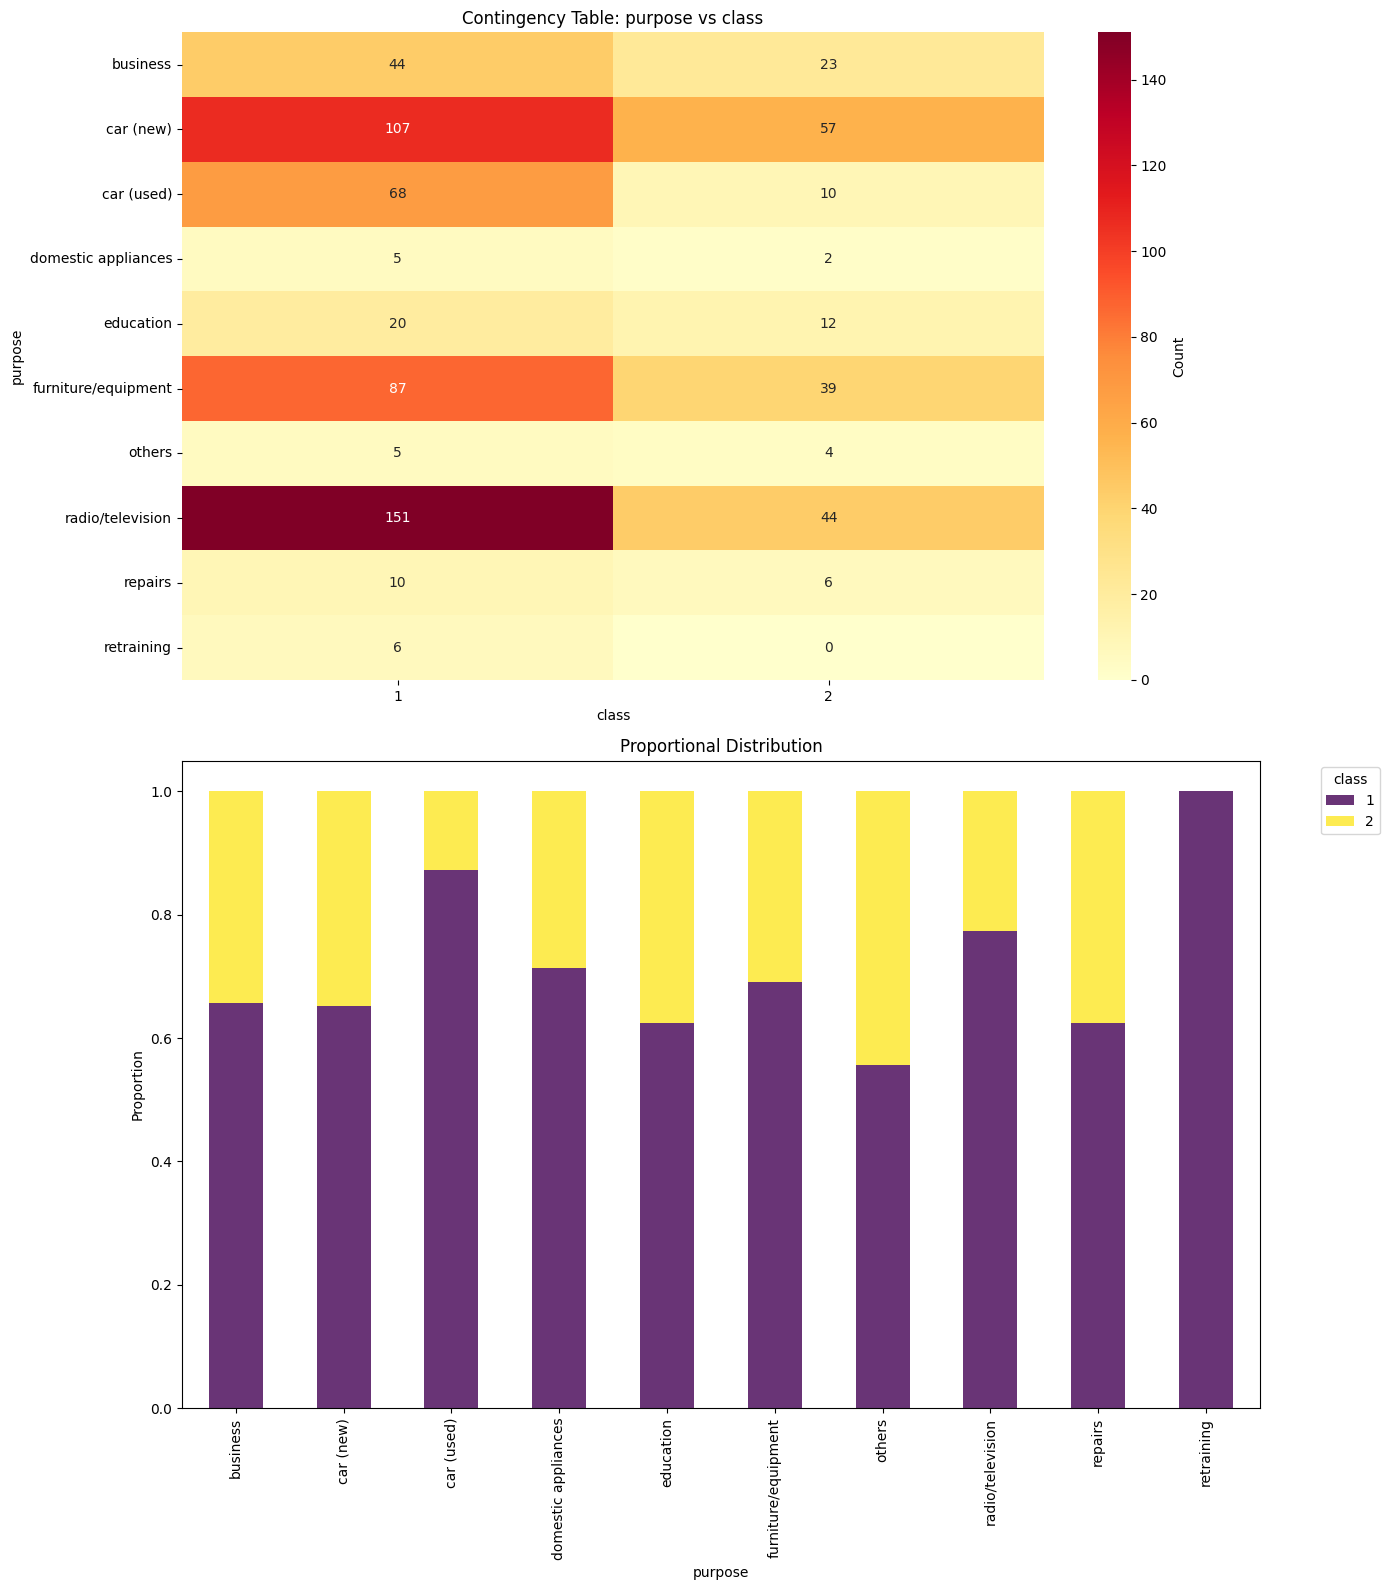




CREDIT RISK VARIABLE ANALYSIS: purpose

📊 CONTINGENCY TABLE (Rows=Categories, Cols=Credit Quality):
   1=Good Credit, 2=Bad Credit
class                  1   2
purpose                     
business              44  23
car (new)            107  57
car (used)            68  10
domestic appliances    5   2
education             20  12
furniture/equipment   87  39
others                 5   4
radio/television     151  44
repairs               10   6
retraining             6   0

📈 BAD CREDIT RATES BY CATEGORY:
   business: 34.3% bad credit | 65.7% good credit
   car (new): 34.8% bad credit | 65.2% good credit
   car (used): 12.8% bad credit | 87.2% good credit
   domestic appliances: 28.6% bad credit | 71.4% good credit
   education: 37.5% bad credit | 62.5% good credit
   furniture/equipment: 31.0% bad credit | 69.0% good credit
   others: 44.4% bad credit | 55.6% good credit
   radio/television: 22.6% bad credit | 77.4% good credit
   repairs: 37.5% bad credit | 62.5% good credit
   r

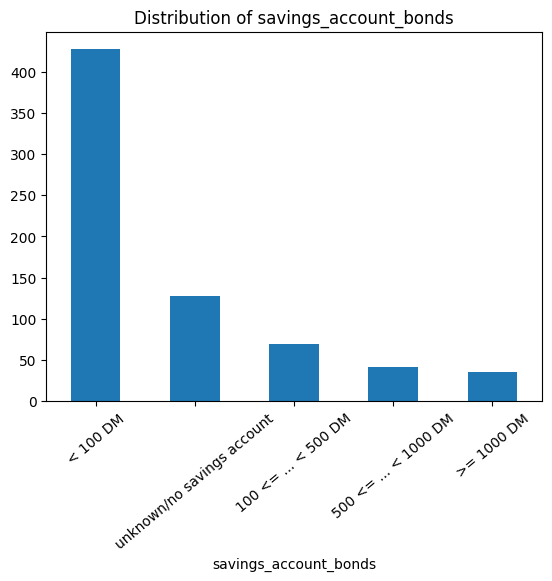

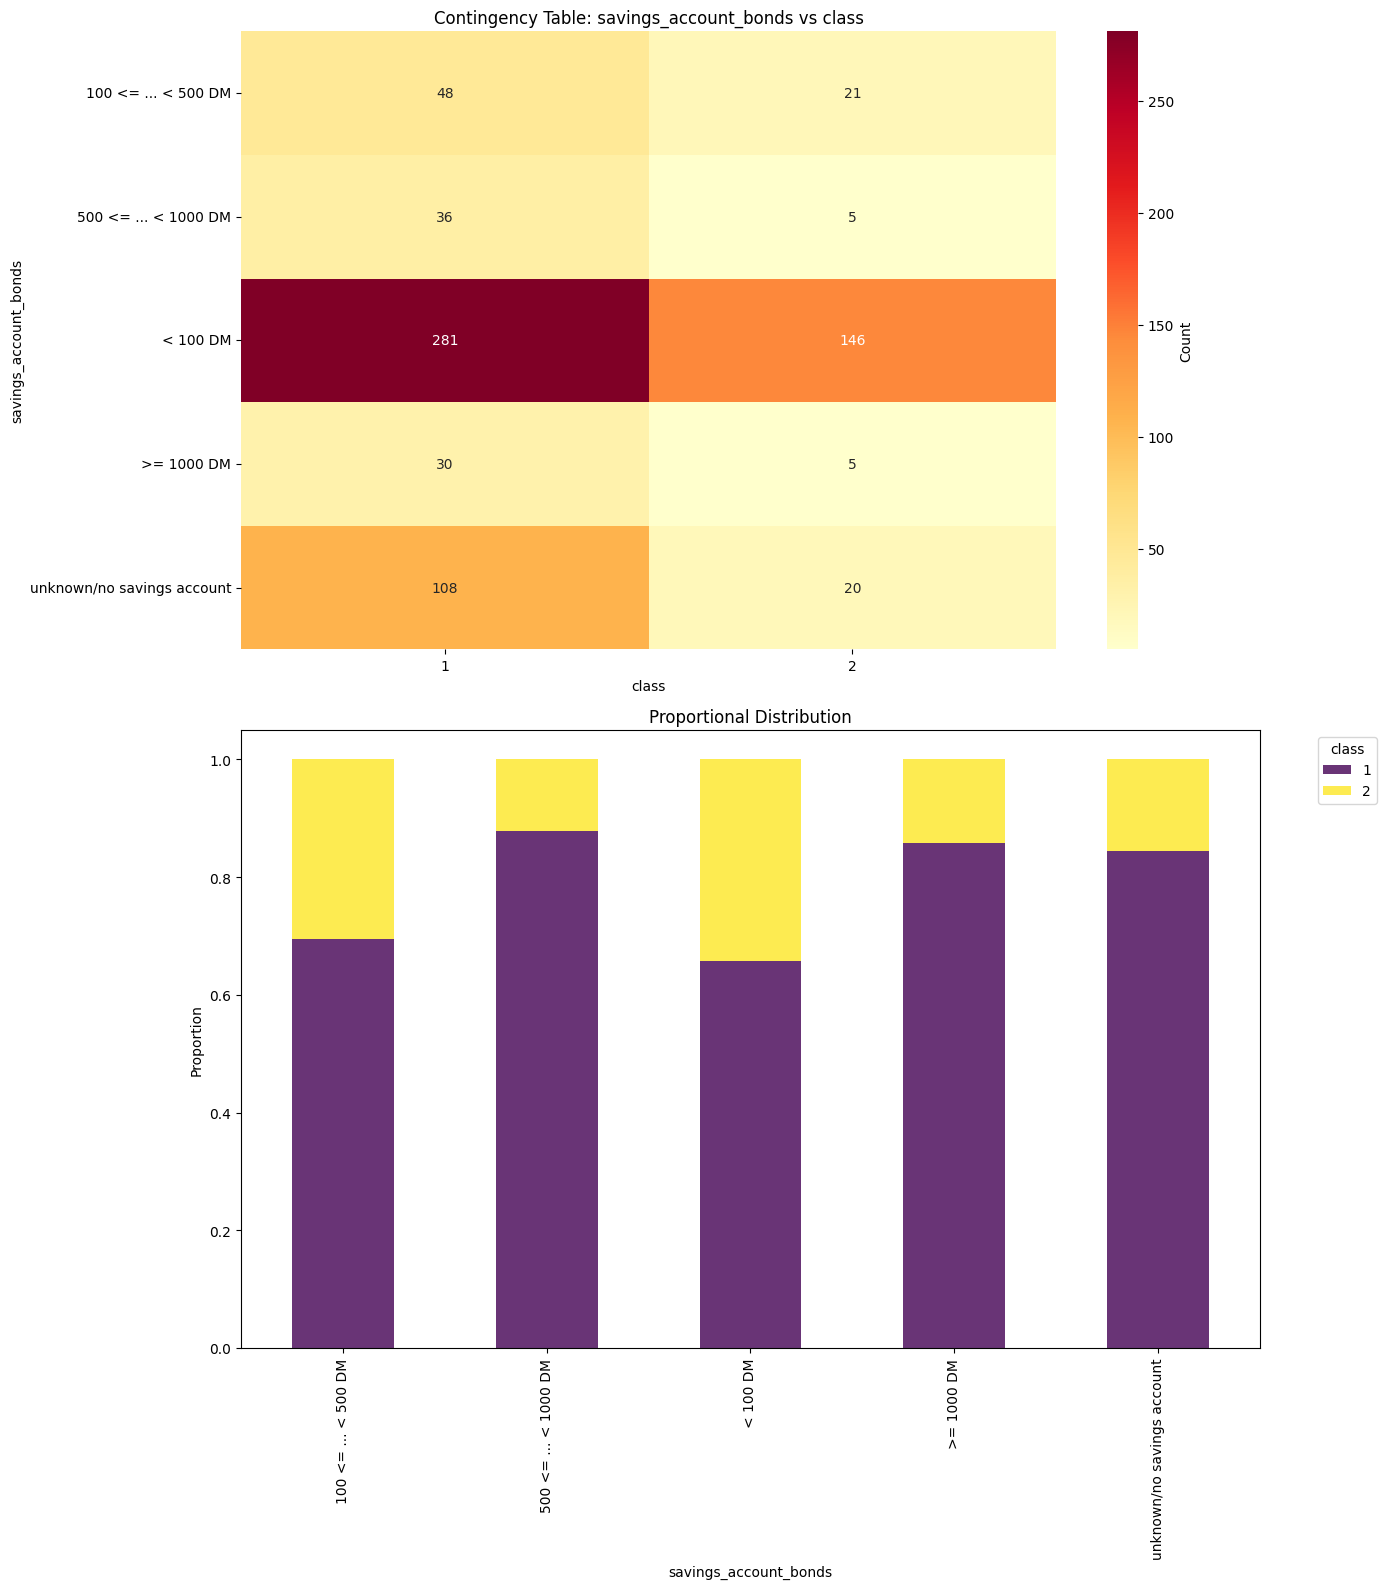




CREDIT RISK VARIABLE ANALYSIS: savings_account_bonds

📊 CONTINGENCY TABLE (Rows=Categories, Cols=Credit Quality):
   1=Good Credit, 2=Bad Credit
class                         1    2
savings_account_bonds               
100 <= ... < 500 DM          48   21
500 <= ... < 1000 DM         36    5
< 100 DM                    281  146
>= 1000 DM                   30    5
unknown/no savings account  108   20

📈 BAD CREDIT RATES BY CATEGORY:
   100 <= ... < 500 DM: 30.4% bad credit | 69.6% good credit
   500 <= ... < 1000 DM: 12.2% bad credit | 87.8% good credit
   < 100 DM: 34.2% bad credit | 65.8% good credit
   >= 1000 DM: 14.3% bad credit | 85.7% good credit
   unknown/no savings account: 15.6% bad credit | 84.4% good credit

🔍 CHI-SQUARE TEST RESULTS:
   Chi-square statistic: 26.3036
   P-value: 0.000027
   Degrees of freedom: 4
   Significant at α=0.05: YES

💪 CRAMÉR'S V RESULTS:
   Cramér's V: 0.1938
   Bias-corrected V: 0.1786
   Strength: Small association (0.1-0.2) - Moderate predi

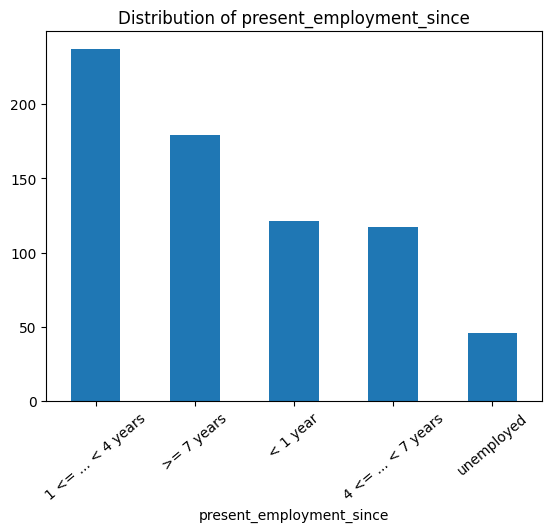

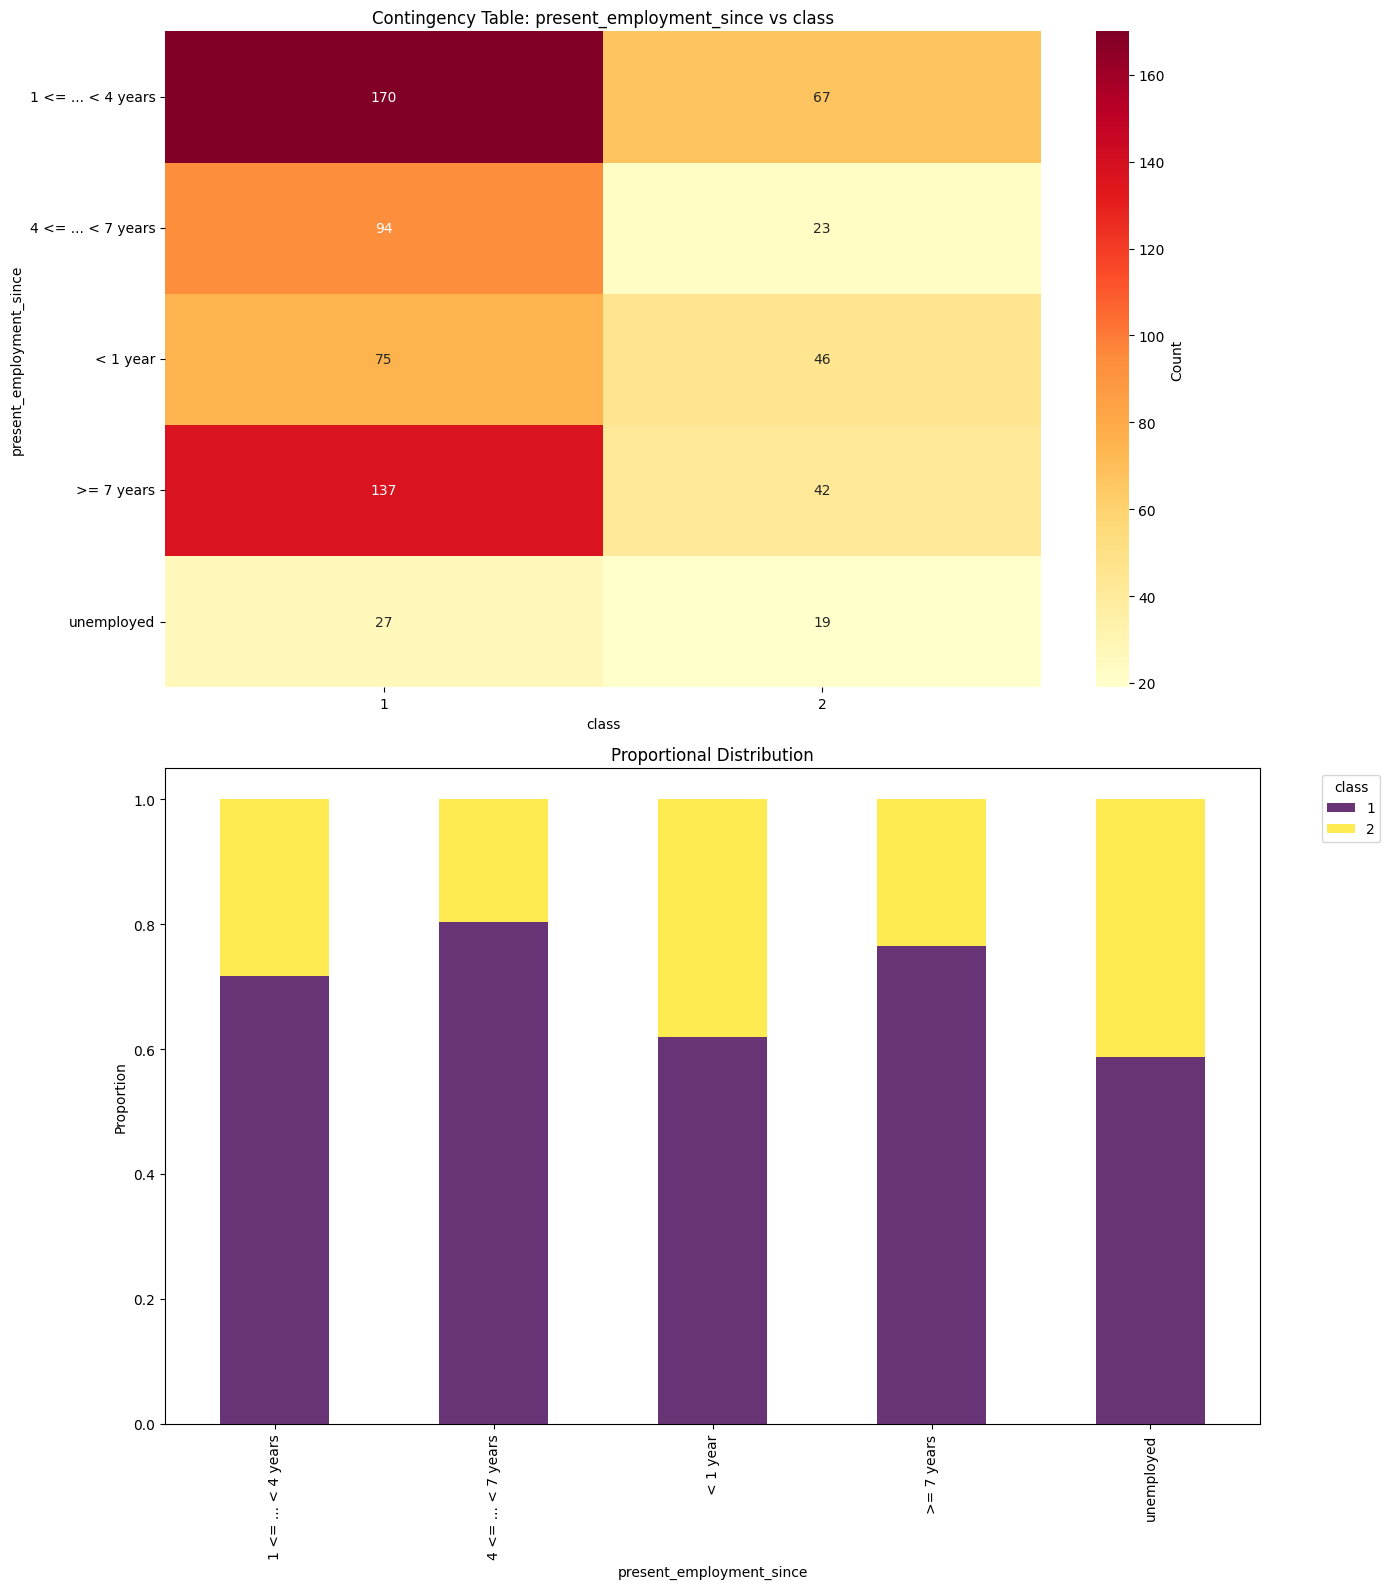




CREDIT RISK VARIABLE ANALYSIS: present_employment_since

📊 CONTINGENCY TABLE (Rows=Categories, Cols=Credit Quality):
   1=Good Credit, 2=Bad Credit
class                       1   2
present_employment_since         
1 <= ... < 4 years        170  67
4 <= ... < 7 years         94  23
< 1 year                   75  46
>= 7 years                137  42
unemployed                 27  19

📈 BAD CREDIT RATES BY CATEGORY:
   1 <= ... < 4 years: 28.3% bad credit | 71.7% good credit
   4 <= ... < 7 years: 19.7% bad credit | 80.3% good credit
   < 1 year: 38.0% bad credit | 62.0% good credit
   >= 7 years: 23.5% bad credit | 76.5% good credit
   unemployed: 41.3% bad credit | 58.7% good credit

🔍 CHI-SQUARE TEST RESULTS:
   Chi-square statistic: 15.8785
   P-value: 0.003187
   Degrees of freedom: 4
   Significant at α=0.05: YES

💪 CRAMÉR'S V RESULTS:
   Cramér's V: 0.1506
   Bias-corrected V: 0.1303
   Strength: Small association (0.1-0.2) - Moderate predictor

📋 CREDIT RISK INTERPRETATION:
 

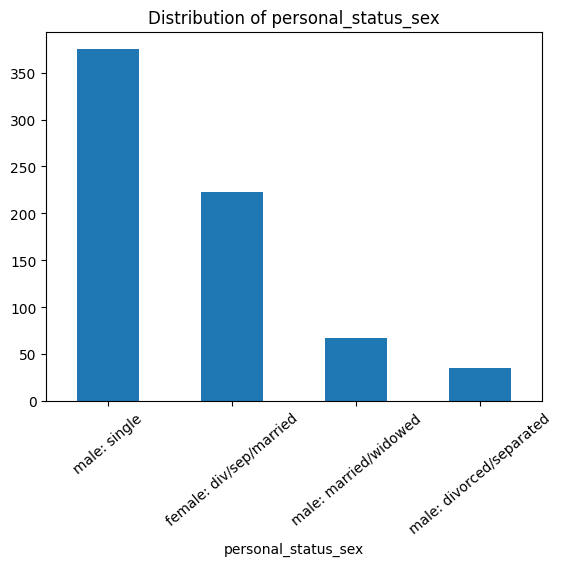

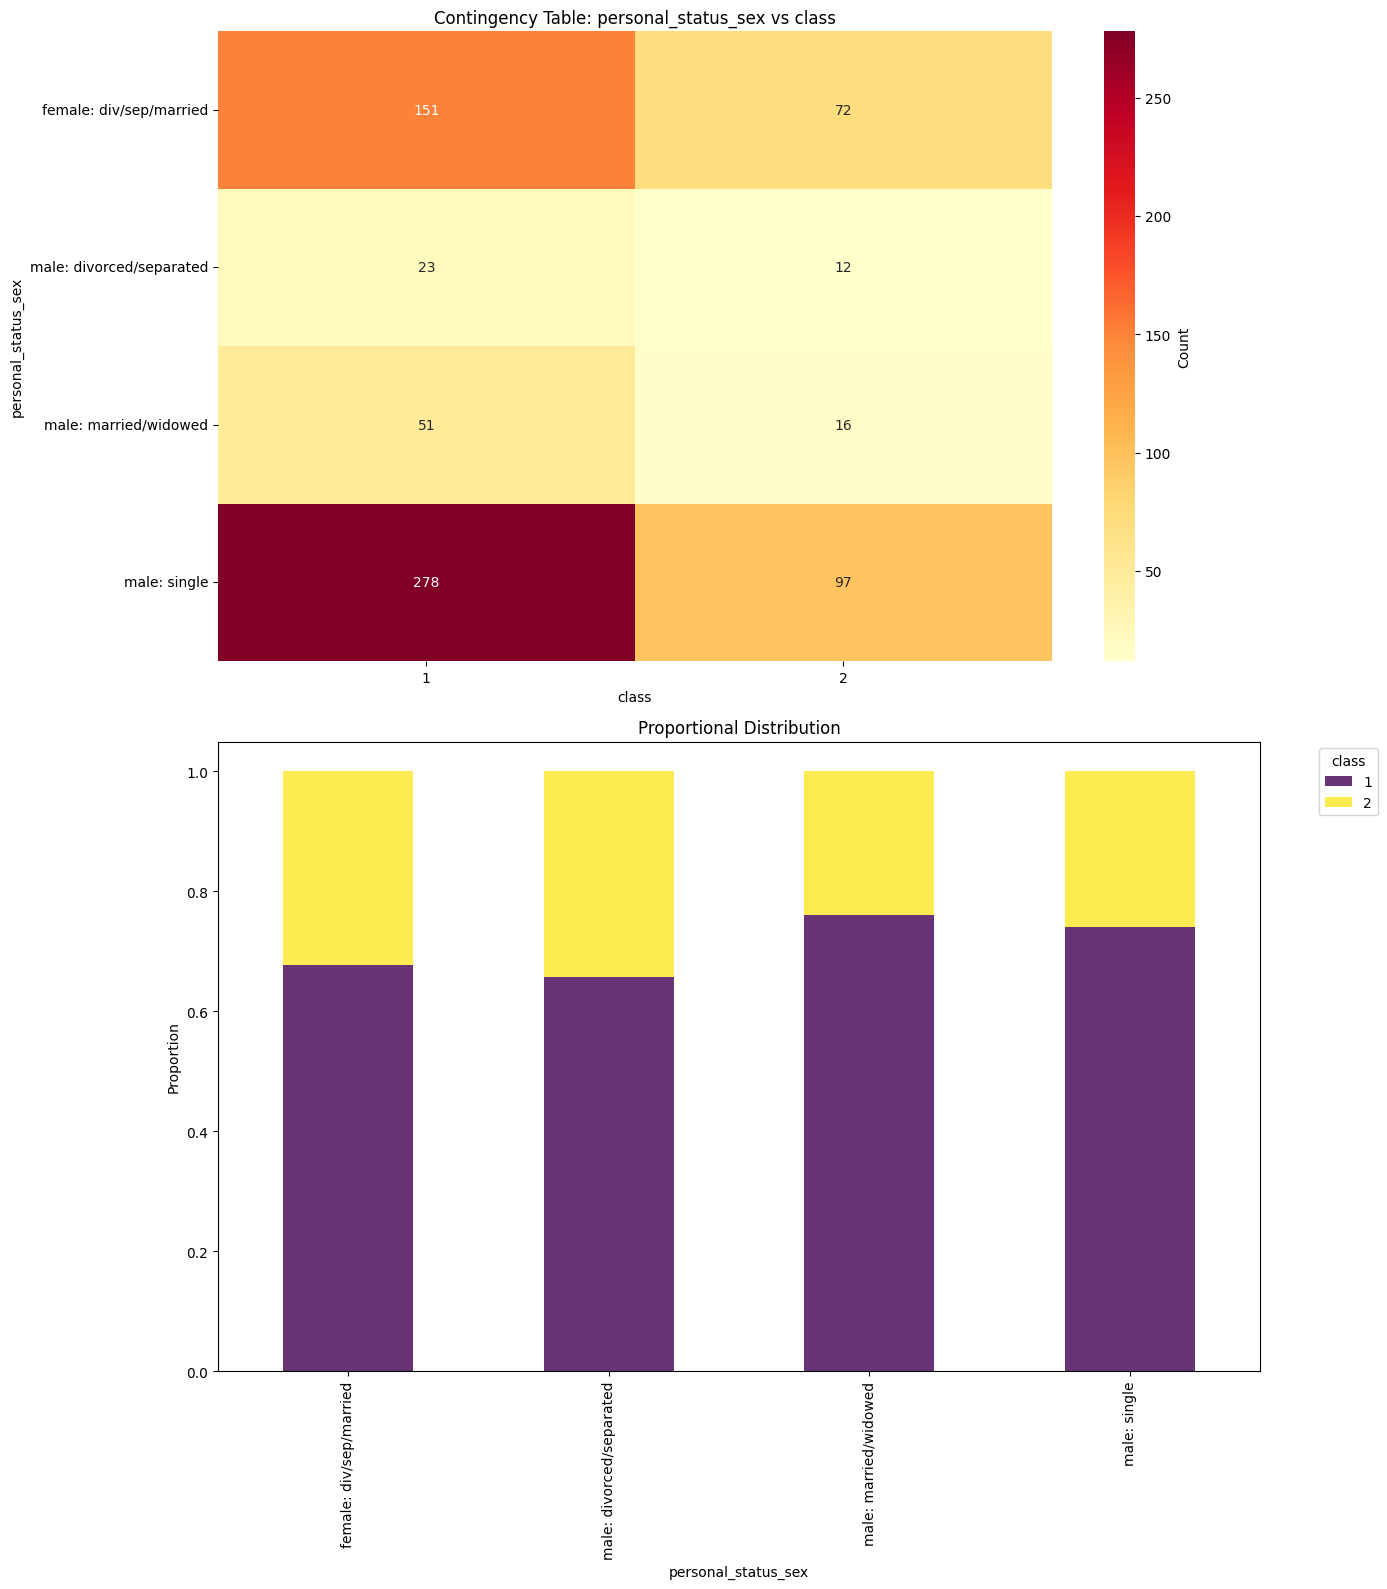




CREDIT RISK VARIABLE ANALYSIS: personal_status_sex

📊 CONTINGENCY TABLE (Rows=Categories, Cols=Credit Quality):
   1=Good Credit, 2=Bad Credit
class                       1   2
personal_status_sex              
female: div/sep/married   151  72
male: divorced/separated   23  12
male: married/widowed      51  16
male: single              278  97

📈 BAD CREDIT RATES BY CATEGORY:
   female: div/sep/married: 32.3% bad credit | 67.7% good credit
   male: divorced/separated: 34.3% bad credit | 65.7% good credit
   male: married/widowed: 23.9% bad credit | 76.1% good credit
   male: single: 25.9% bad credit | 74.1% good credit

🔍 CHI-SQUARE TEST RESULTS:
   Chi-square statistic: 4.1095
   P-value: 0.249877
   Degrees of freedom: 3
   Significant at α=0.05: NO

💪 CRAMÉR'S V RESULTS:
   Cramér's V: 0.0766
   Bias-corrected V: 0.0398
   Strength: Negligible association (< 0.1) - Weak predictor

📋 CREDIT RISK INTERPRETATION:
   NO significant relationship (p=0.249877). Variables appear indepen

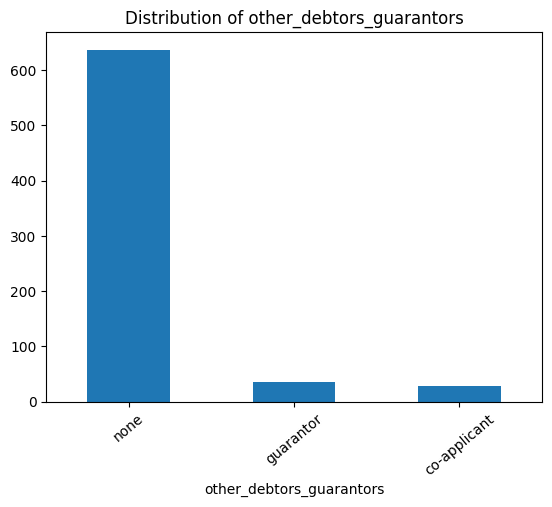

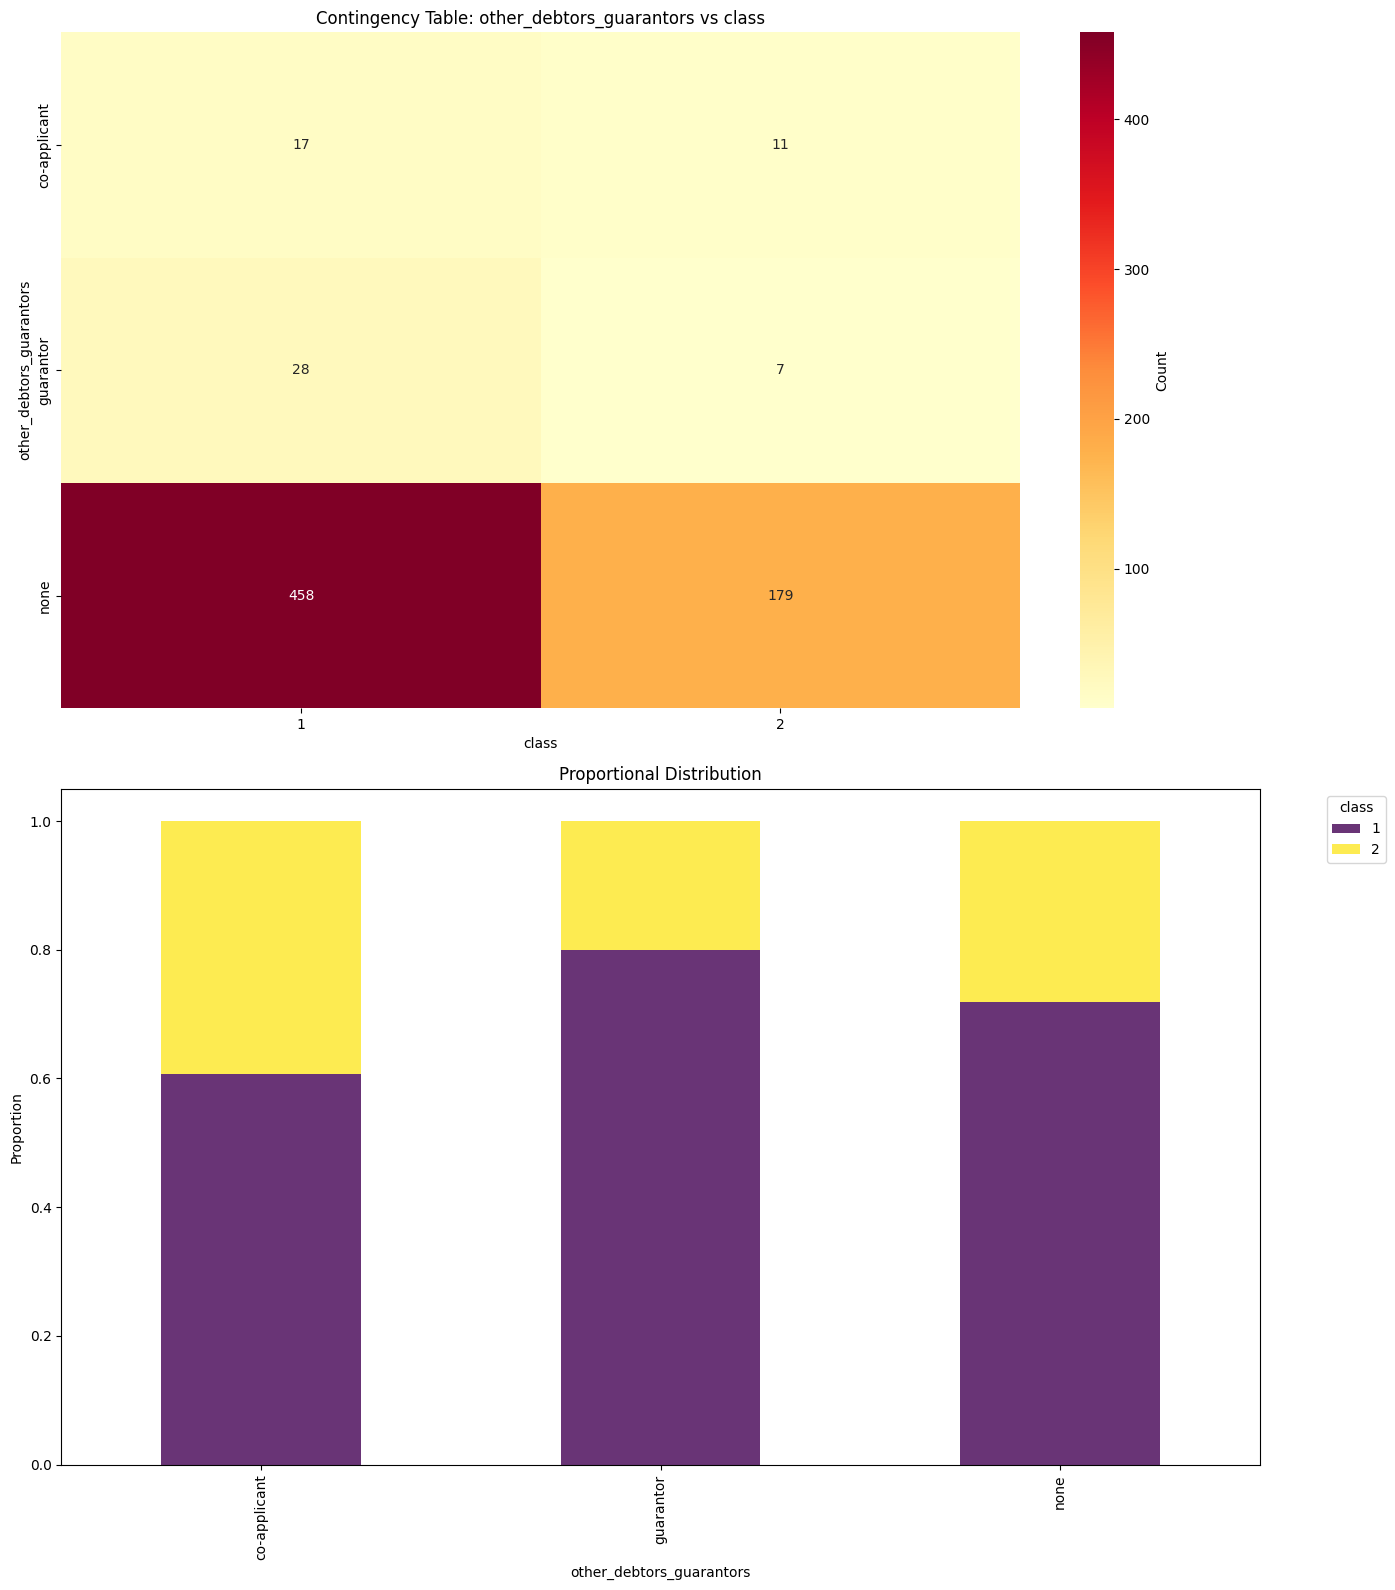




CREDIT RISK VARIABLE ANALYSIS: other_debtors_guarantors

📊 CONTINGENCY TABLE (Rows=Categories, Cols=Credit Quality):
   1=Good Credit, 2=Bad Credit
class                       1    2
other_debtors_guarantors          
co-applicant               17   11
guarantor                  28    7
none                      458  179

📈 BAD CREDIT RATES BY CATEGORY:
   co-applicant: 39.3% bad credit | 60.7% good credit
   guarantor: 20.0% bad credit | 80.0% good credit
   none: 28.1% bad credit | 71.9% good credit

🔍 CHI-SQUARE TEST RESULTS:
   Chi-square statistic: 2.8673
   P-value: 0.238438
   Degrees of freedom: 2
   Significant at α=0.05: NO

💪 CRAMÉR'S V RESULTS:
   Cramér's V: 0.0640
   Bias-corrected V: 0.0352
   Strength: Negligible association (< 0.1) - Weak predictor

📋 CREDIT RISK INTERPRETATION:
   NO significant relationship (p=0.238438). Variables appear independent.

🎯 RISK RANKING ANALYSIS:
   Categories ranked by bad credit rate (highest to lowest risk):
   1. co-applicant: 39.

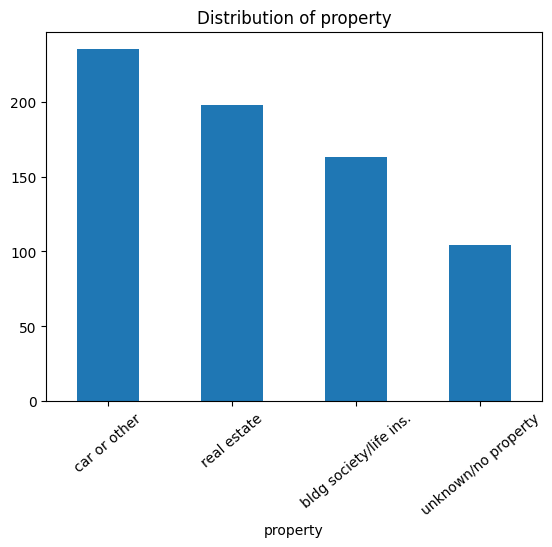

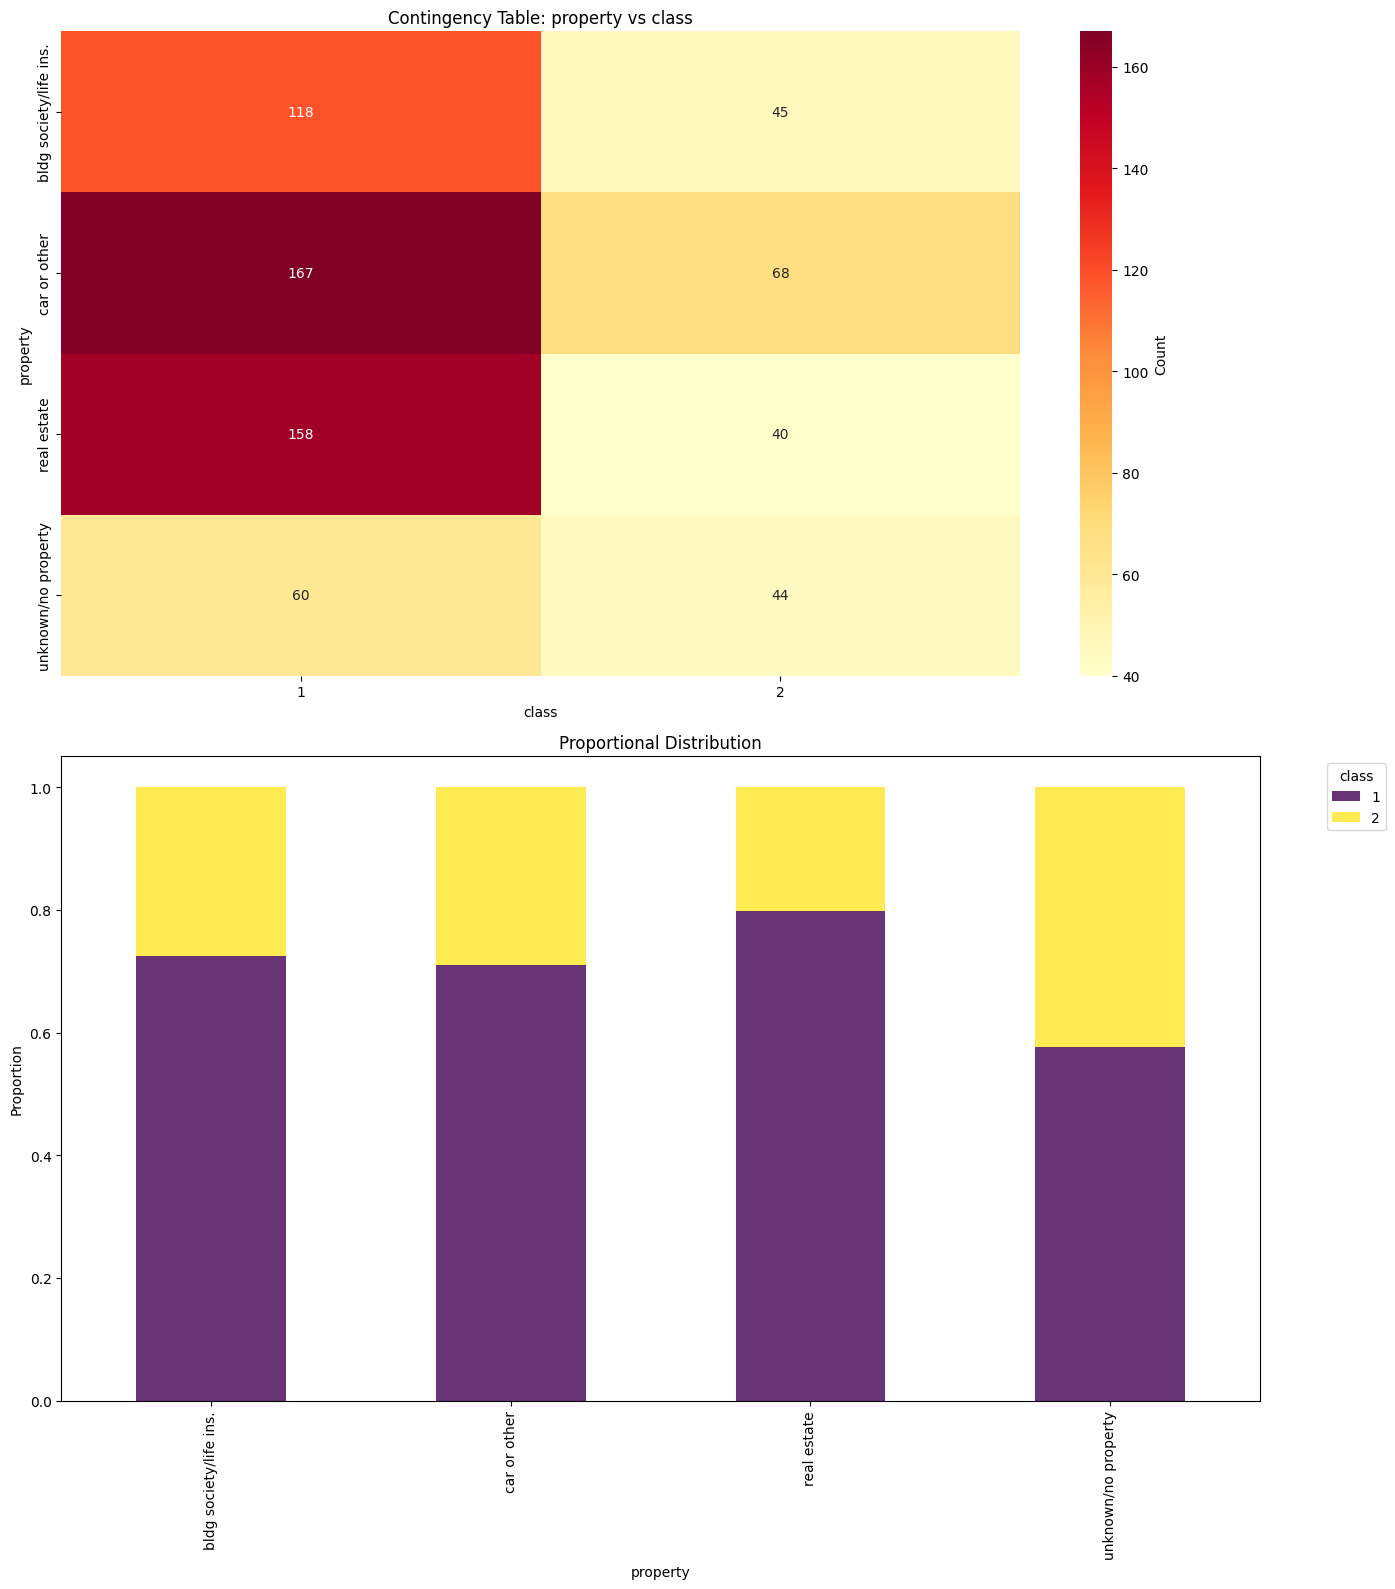




CREDIT RISK VARIABLE ANALYSIS: property

📊 CONTINGENCY TABLE (Rows=Categories, Cols=Credit Quality):
   1=Good Credit, 2=Bad Credit
class                     1   2
property                       
bldg society/life ins.  118  45
car or other            167  68
real estate             158  40
unknown/no property      60  44

📈 BAD CREDIT RATES BY CATEGORY:
   bldg society/life ins.: 27.6% bad credit | 72.4% good credit
   car or other: 28.9% bad credit | 71.1% good credit
   real estate: 20.2% bad credit | 79.8% good credit
   unknown/no property: 42.3% bad credit | 57.7% good credit

🔍 CHI-SQUARE TEST RESULTS:
   Chi-square statistic: 16.5887
   P-value: 0.000859
   Degrees of freedom: 3
   Significant at α=0.05: YES

💪 CRAMÉR'S V RESULTS:
   Cramér's V: 0.1539
   Bias-corrected V: 0.1394
   Strength: Small association (0.1-0.2) - Moderate predictor

📋 CREDIT RISK INTERPRETATION:
   SIGNIFICANT relationship detected (p=0.000859). The categorical variable shows strong association with

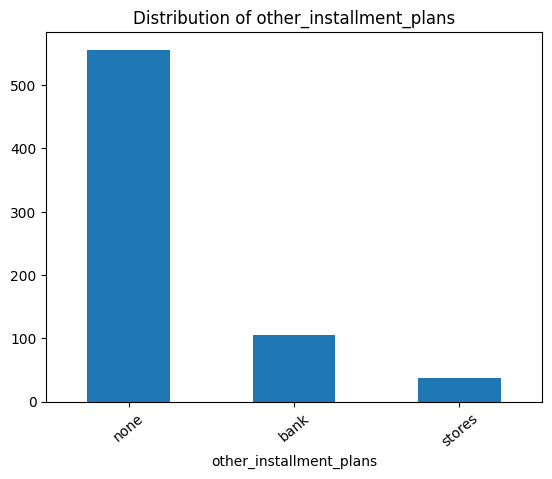

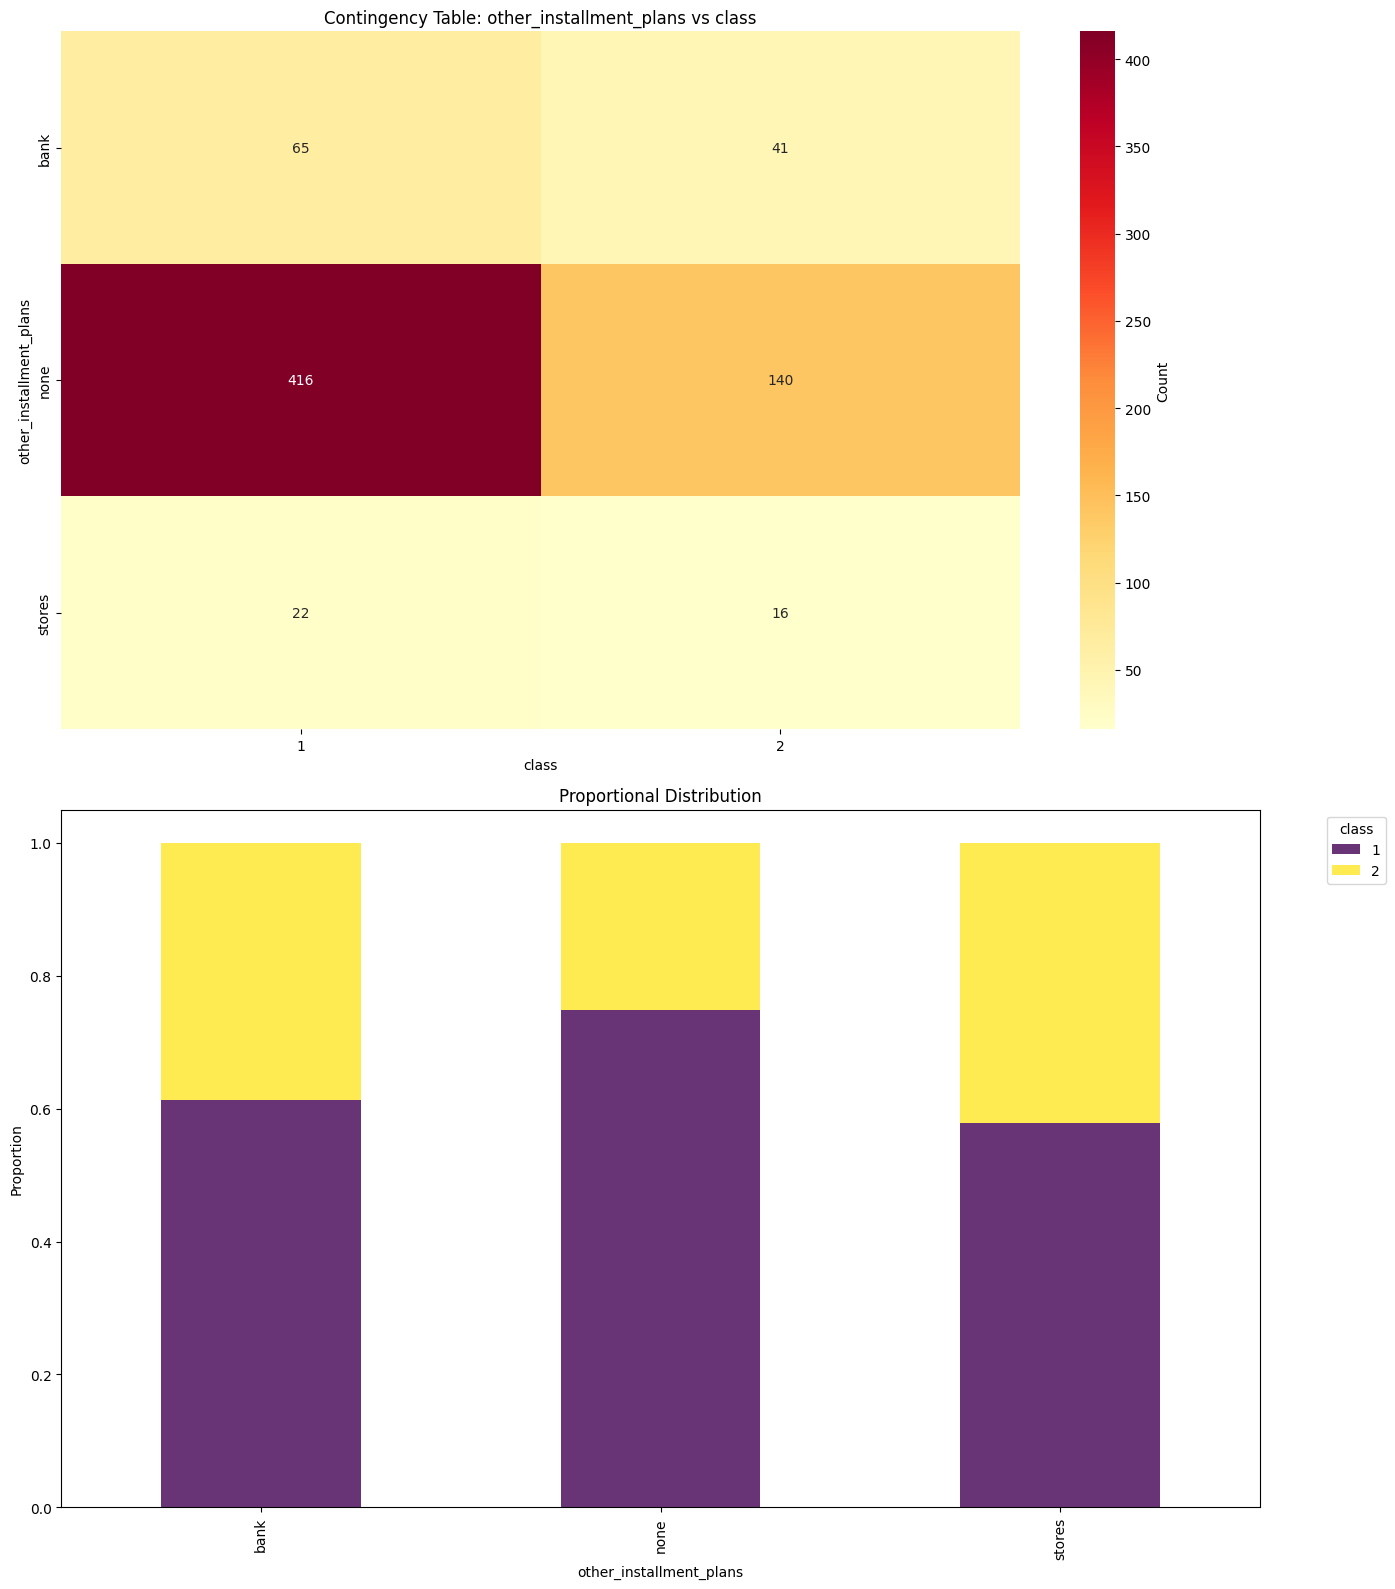




CREDIT RISK VARIABLE ANALYSIS: other_installment_plans

📊 CONTINGENCY TABLE (Rows=Categories, Cols=Credit Quality):
   1=Good Credit, 2=Bad Credit
class                      1    2
other_installment_plans          
bank                      65   41
none                     416  140
stores                    22   16

📈 BAD CREDIT RATES BY CATEGORY:
   bank: 38.7% bad credit | 61.3% good credit
   none: 25.2% bad credit | 74.8% good credit
   stores: 42.1% bad credit | 57.9% good credit

🔍 CHI-SQUARE TEST RESULTS:
   Chi-square statistic: 11.8961
   P-value: 0.002611
   Degrees of freedom: 2
   Significant at α=0.05: YES

💪 CRAMÉR'S V RESULTS:
   Cramér's V: 0.1304
   Bias-corrected V: 0.1190
   Strength: Small association (0.1-0.2) - Moderate predictor

📋 CREDIT RISK INTERPRETATION:
   SIGNIFICANT relationship detected (p=0.002611). The categorical variable shows moderate association with credit quality.

🎯 RISK RANKING ANALYSIS:
   Categories ranked by bad credit rate (highest to lo

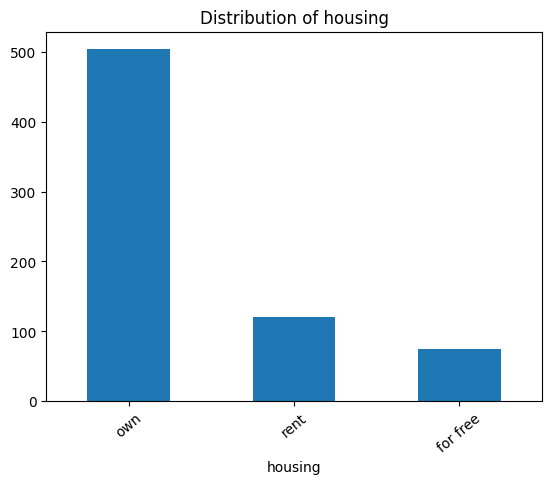

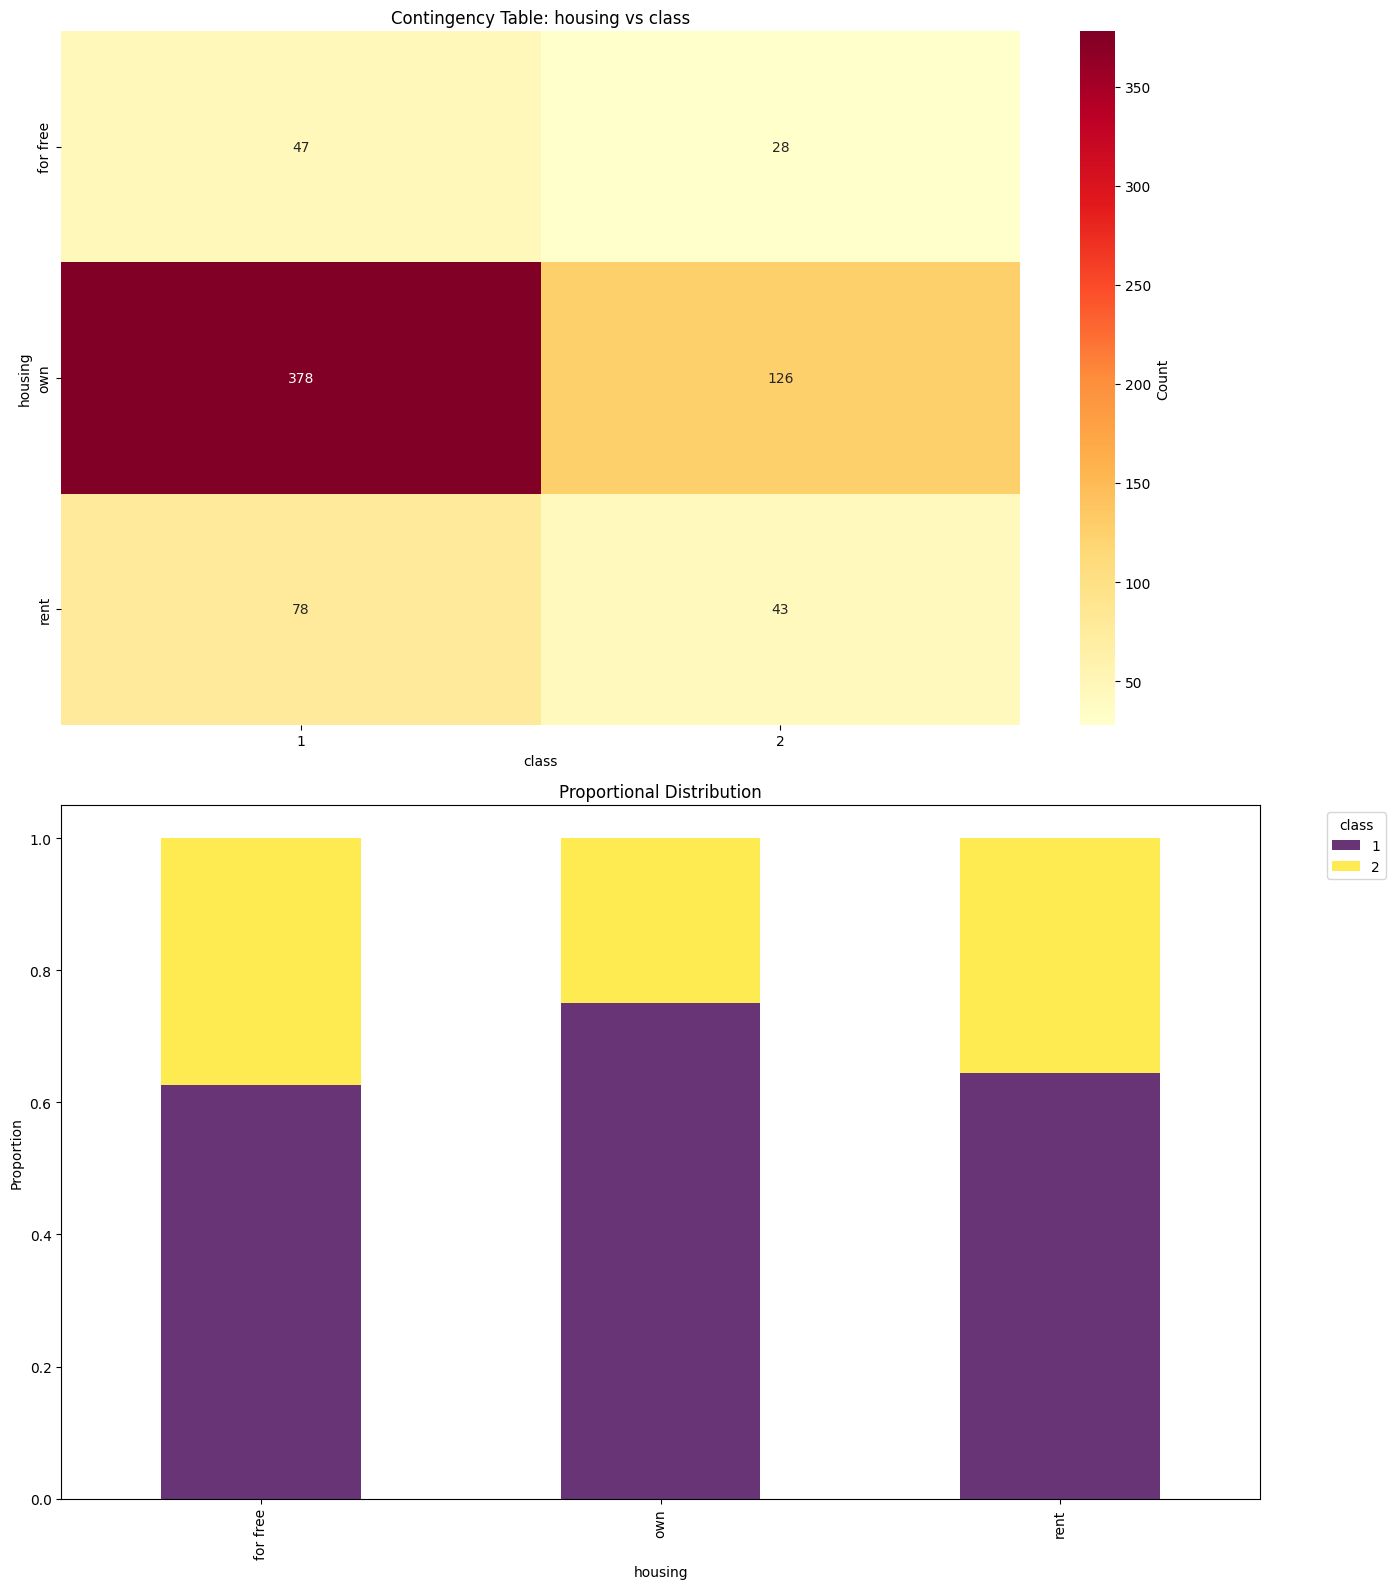




CREDIT RISK VARIABLE ANALYSIS: housing

📊 CONTINGENCY TABLE (Rows=Categories, Cols=Credit Quality):
   1=Good Credit, 2=Bad Credit
class       1    2
housing           
for free   47   28
own       378  126
rent       78   43

📈 BAD CREDIT RATES BY CATEGORY:
   for free: 37.3% bad credit | 62.7% good credit
   own: 25.0% bad credit | 75.0% good credit
   rent: 35.5% bad credit | 64.5% good credit

🔍 CHI-SQUARE TEST RESULTS:
   Chi-square statistic: 8.8658
   P-value: 0.011880
   Degrees of freedom: 2
   Significant at α=0.05: YES

💪 CRAMÉR'S V RESULTS:
   Cramér's V: 0.1125
   Bias-corrected V: 0.0991
   Strength: Negligible association (< 0.1) - Weak predictor

📋 CREDIT RISK INTERPRETATION:
   SIGNIFICANT relationship detected (p=0.011880). The categorical variable shows moderate association with credit quality.

🎯 RISK RANKING ANALYSIS:
   Categories ranked by bad credit rate (highest to lowest risk):
   1. for free: 37.3% bad credit rate
   2. rent: 35.5% bad credit rate
   3. ow

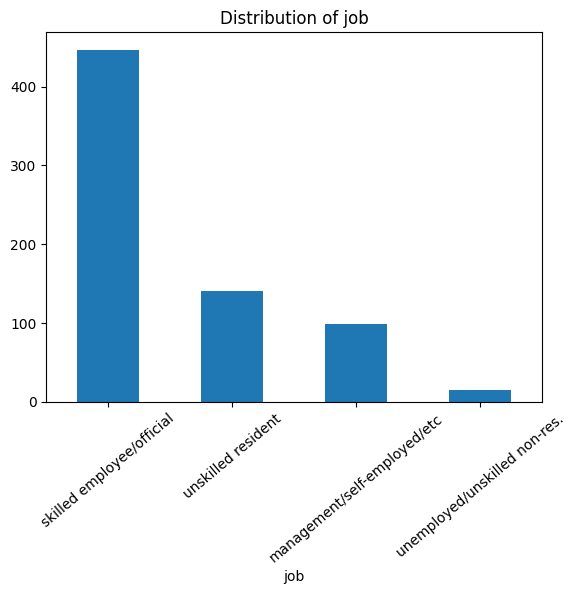

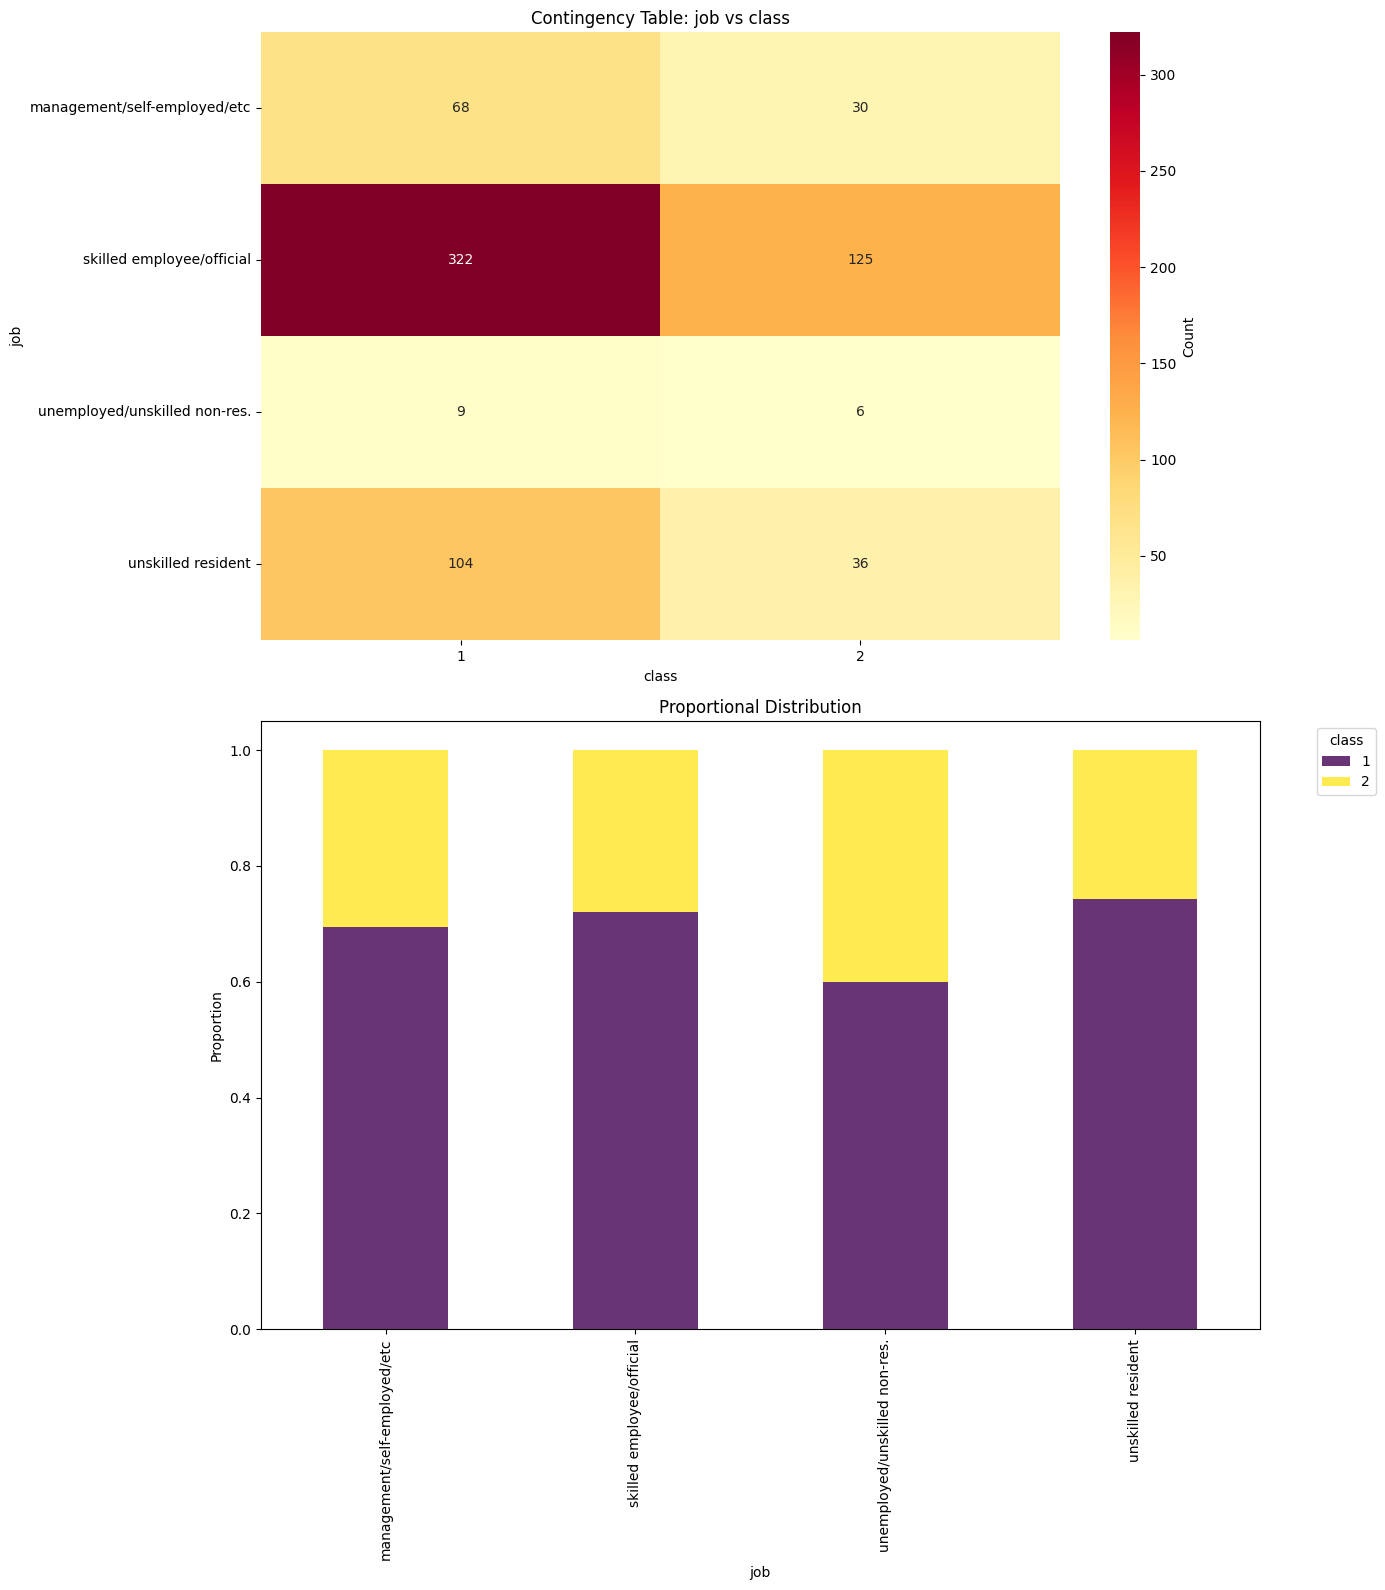




CREDIT RISK VARIABLE ANALYSIS: job

📊 CONTINGENCY TABLE (Rows=Categories, Cols=Credit Quality):
   1=Good Credit, 2=Bad Credit
class                            1    2
job                                    
management/self-employed/etc    68   30
skilled employee/official      322  125
unemployed/unskilled non-res.    9    6
unskilled resident             104   36

📈 BAD CREDIT RATES BY CATEGORY:
   management/self-employed/etc: 30.6% bad credit | 69.4% good credit
   skilled employee/official: 28.0% bad credit | 72.0% good credit
   unemployed/unskilled non-res.: 40.0% bad credit | 60.0% good credit
   unskilled resident: 25.7% bad credit | 74.3% good credit

🔍 CHI-SQUARE TEST RESULTS:
   Chi-square statistic: 1.7537
   P-value: 0.625061
   Degrees of freedom: 3
   Significant at α=0.05: NO

💪 CRAMÉR'S V RESULTS:
   Cramér's V: 0.0501
   Bias-corrected V: 0.0000
   Strength: Negligible association (< 0.1) - Weak predictor

📋 CREDIT RISK INTERPRETATION:
   NO significant relationshi

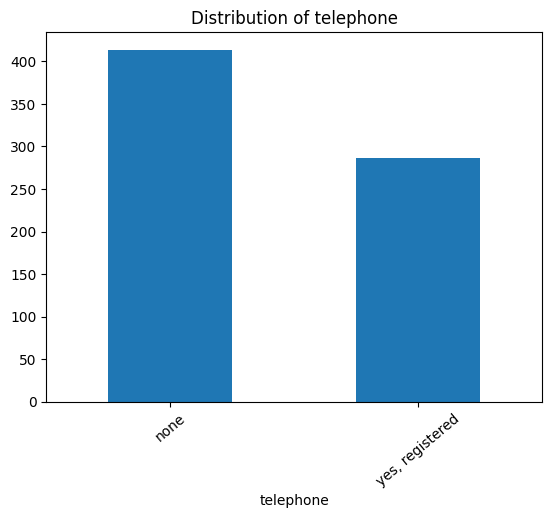

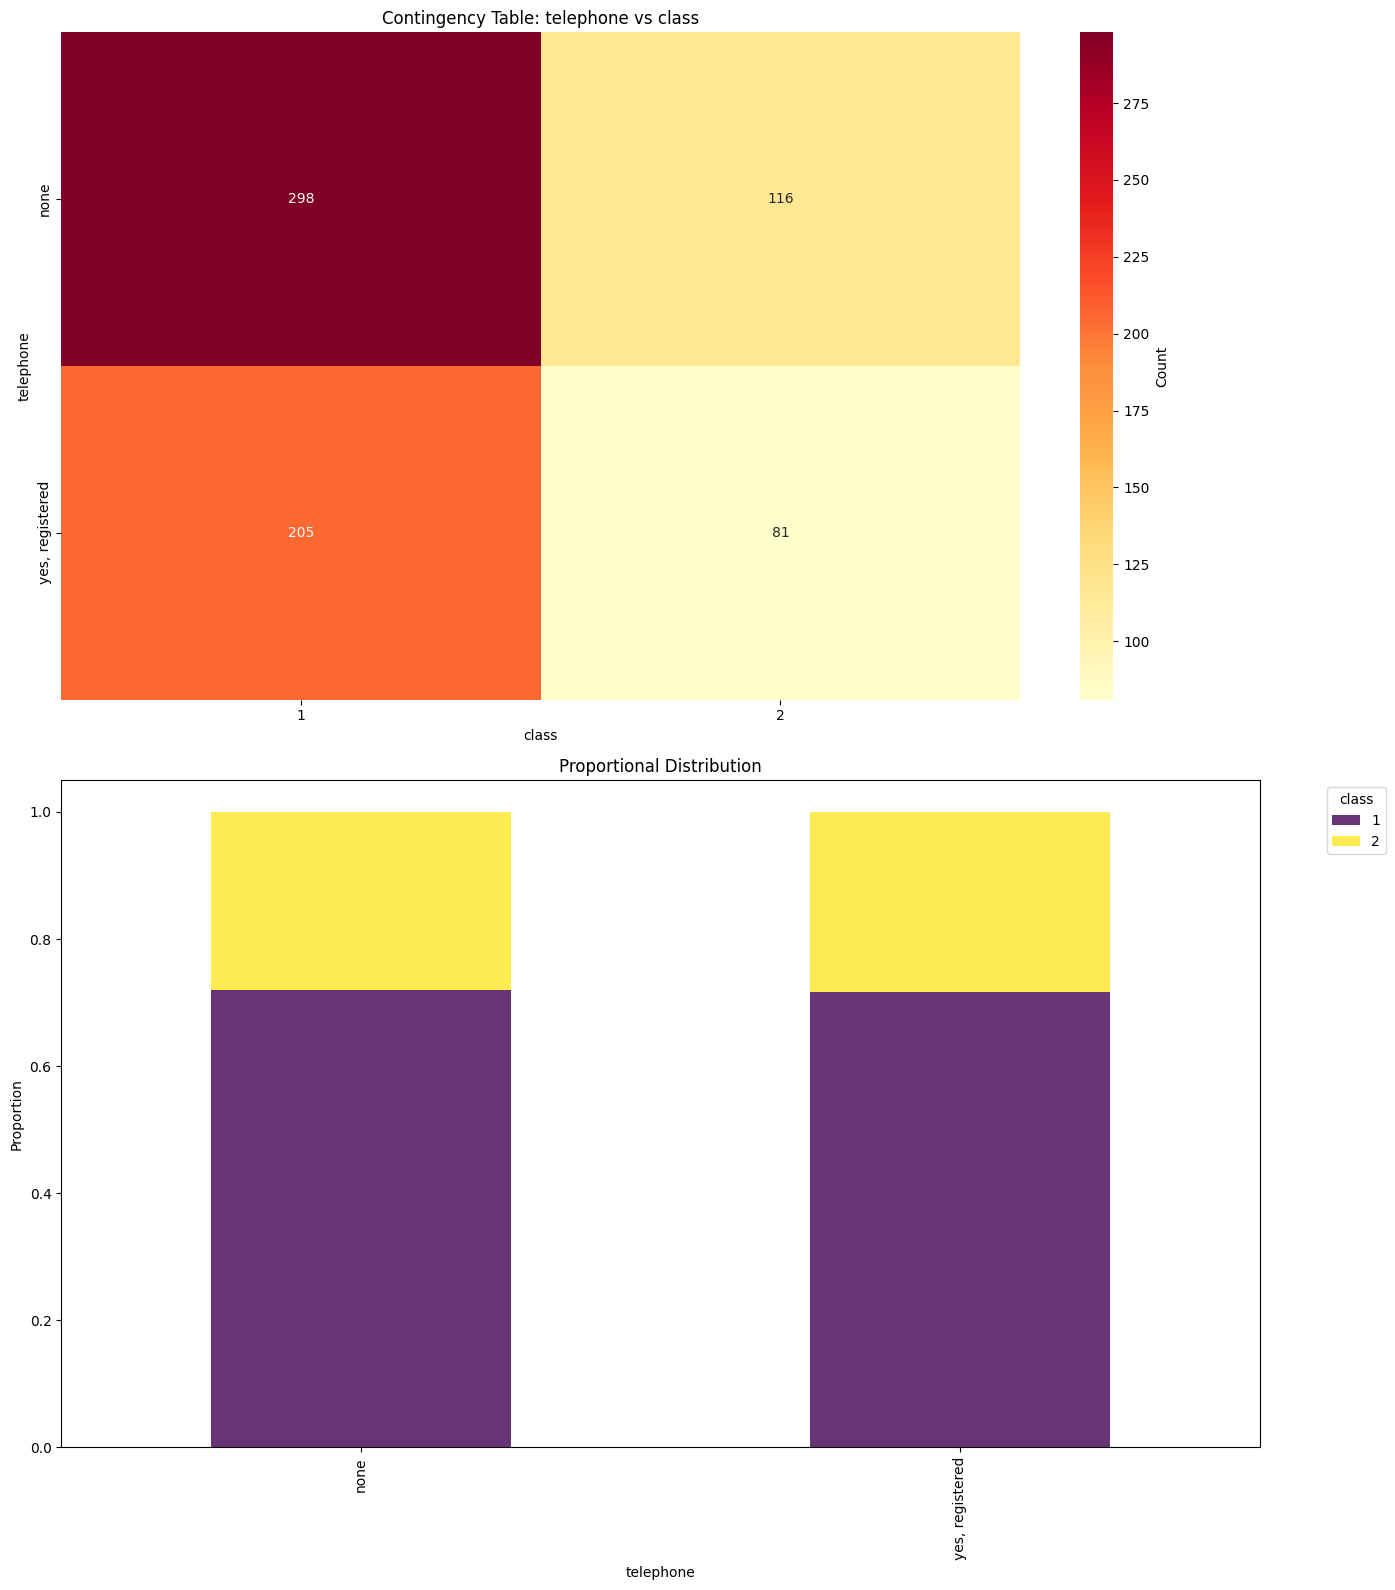




CREDIT RISK VARIABLE ANALYSIS: telephone

📊 CONTINGENCY TABLE (Rows=Categories, Cols=Credit Quality):
   1=Good Credit, 2=Bad Credit
class              1    2
telephone                
none             298  116
yes, registered  205   81

📈 BAD CREDIT RATES BY CATEGORY:
   none: 28.0% bad credit | 72.0% good credit
   yes, registered: 28.3% bad credit | 71.7% good credit

🔍 CHI-SQUARE TEST RESULTS:
   Chi-square statistic: 0.0000
   P-value: 0.998441
   Degrees of freedom: 1
   Significant at α=0.05: NO

💪 CRAMÉR'S V RESULTS:
   Cramér's V: 0.0001
   Bias-corrected V: 0.0000
   Strength: Negligible association (< 0.1) - Weak predictor

📋 CREDIT RISK INTERPRETATION:
   NO significant relationship (p=0.998441). Variables appear independent.

🎯 RISK RANKING ANALYSIS:
   Categories ranked by bad credit rate (highest to lowest risk):
   1. yes, registered: 28.3% bad credit rate
   2. none: 28.0% bad credit rate
Column: foreign_worker
foreign_worker
yes    0.964286
no     0.035714
Name: pr

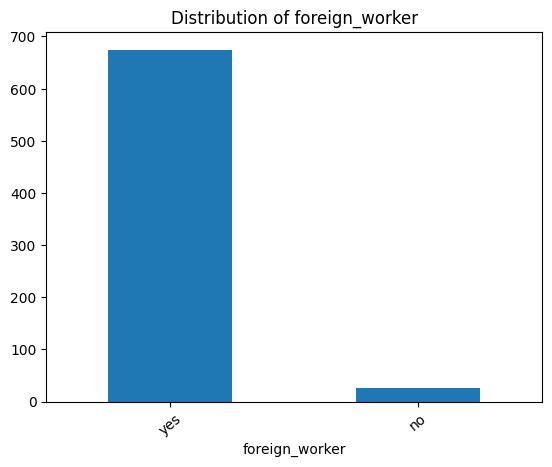

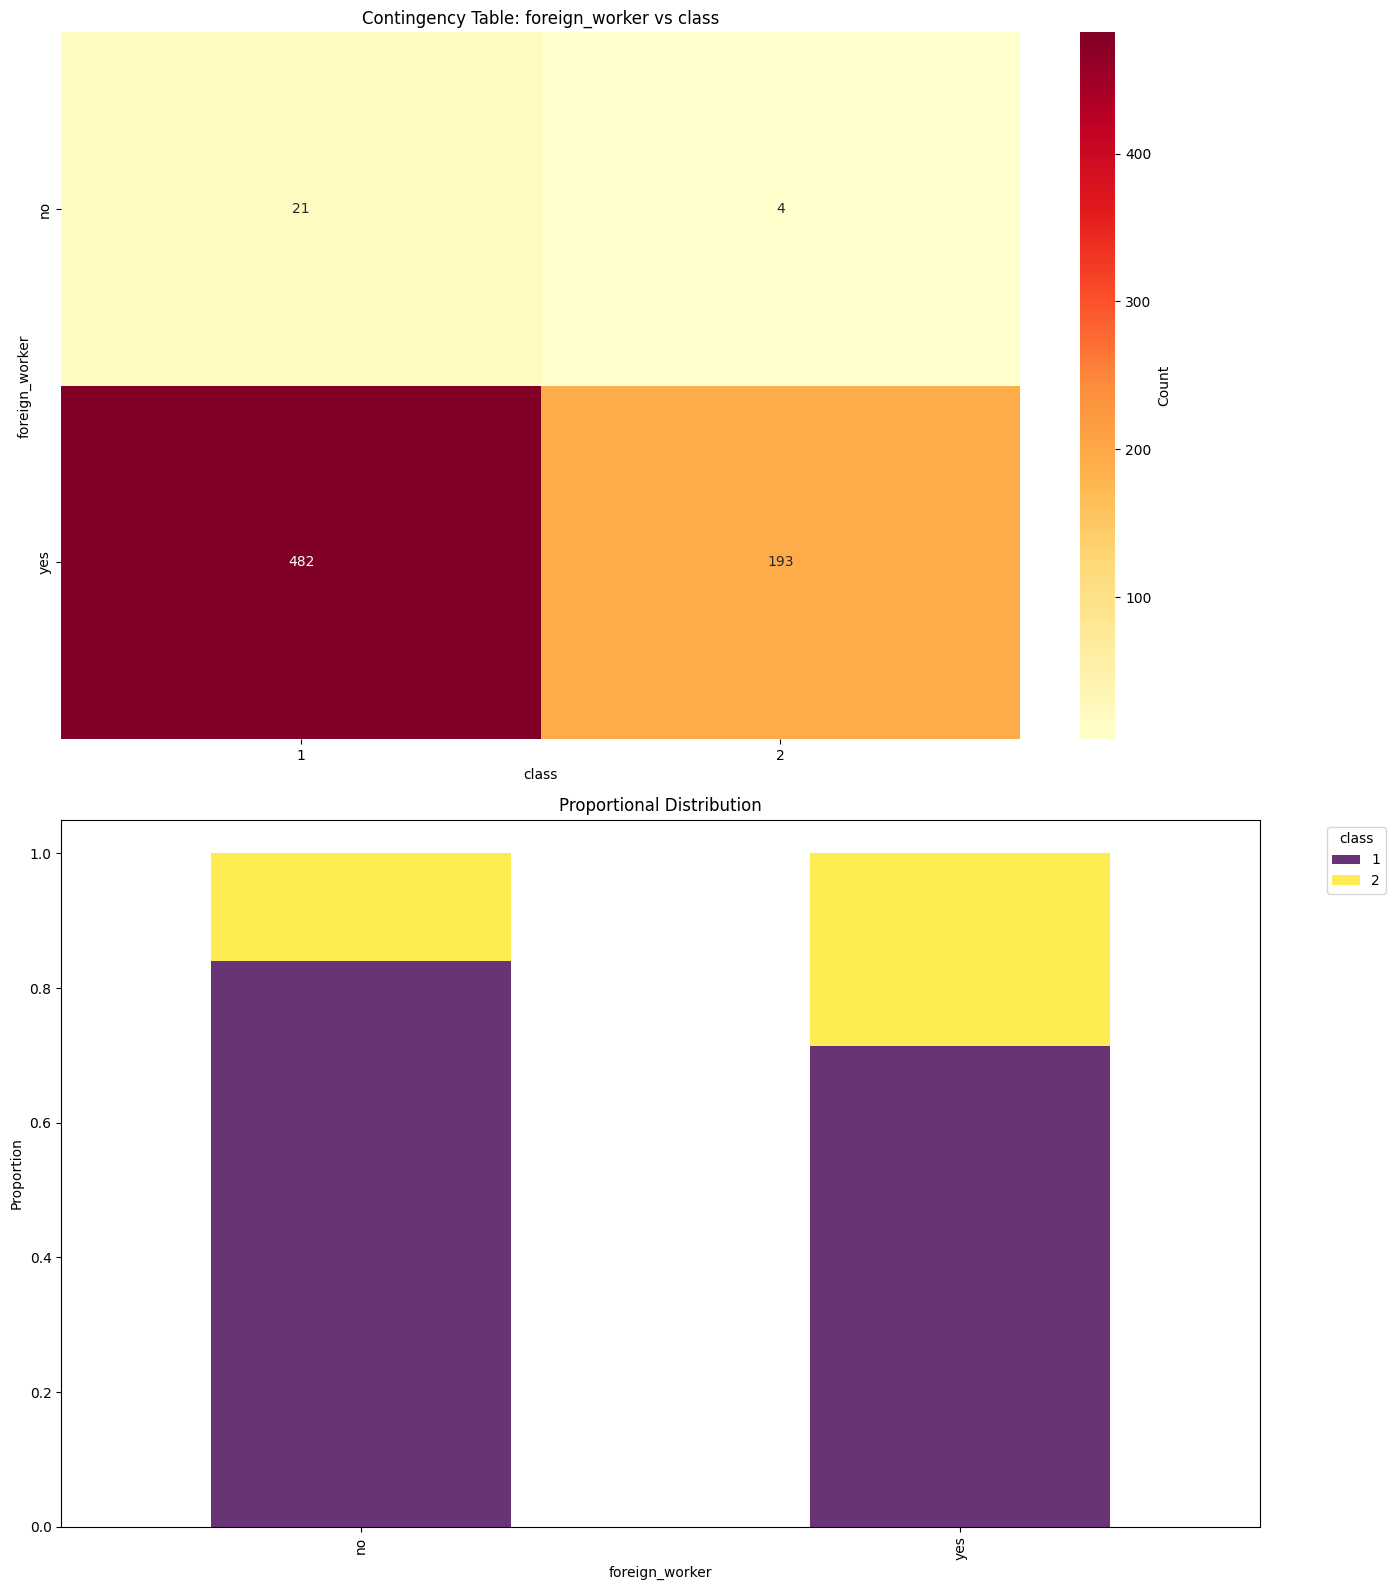




CREDIT RISK VARIABLE ANALYSIS: foreign_worker

📊 CONTINGENCY TABLE (Rows=Categories, Cols=Credit Quality):
   1=Good Credit, 2=Bad Credit
class             1    2
foreign_worker          
no               21    4
yes             482  193

📈 BAD CREDIT RATES BY CATEGORY:
   no: 16.0% bad credit | 84.0% good credit
   yes: 28.6% bad credit | 71.4% good credit

🔍 CHI-SQUARE TEST RESULTS:
   Chi-square statistic: 1.3189
   P-value: 0.250787
   Degrees of freedom: 1
   Significant at α=0.05: NO

💪 CRAMÉR'S V RESULTS:
   Cramér's V: 0.0434
   Bias-corrected V: 0.0213
   Strength: Negligible association (< 0.1) - Weak predictor

📋 CREDIT RISK INTERPRETATION:
   NO significant relationship (p=0.250787). Variables appear independent.

🎯 RISK RANKING ANALYSIS:
   Categories ranked by bad credit rate (highest to lowest risk):
   1. yes: 28.6% bad credit rate
   2. no: 16.0% bad credit rate


In [16]:
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        print(f"Column: {col}")
        print(X_train[col].value_counts(normalize=True))
        print("\n")
        X_train[col].value_counts().plot.bar(rot=40)
        plt.title(f"Distribution of {col}")
        plt.show()
        print("\n\n")
        
        
        print("\n")
        ct = pd.crosstab(X_train[col], y_train)
        plot_categorical_categorical(ct, col, 'class')
        print("\n\n")
        
        analyze_credit_variable(X_train, col, y_train)
        
        print("=" * 80)

In [36]:
y_train[:5]

514    1
809    2
241    1
434    1
351    2
Name: class, dtype: int64

In [12]:
def plot_categorical_categorical(contingency, col1, col2):
        """Create heatmap and stacked bar chart for categorical relationships."""
        fig, axes = plt.subplots(2, 1, figsize=(14, 16))
        
        # Heatmap
        sns.heatmap(contingency, annot=True, fmt='d', cmap='YlOrRd', 
                   ax=axes[0], cbar_kws={'label': 'Count'})
        axes[0].set_title(f'Contingency Table: {col1} vs {col2}')
        axes[0].set_xlabel(col2)
        axes[0].set_ylabel(col1)
        
        # Stacked bar chart (proportions)
        contingency_pct = contingency.div(contingency.sum(axis=1), axis=0)
        contingency_pct.plot(kind='bar', stacked=True, ax=axes[1], 
                           colormap='viridis', alpha=0.8)
        axes[1].set_title(f'Proportional Distribution')
        axes[1].set_xlabel(col1)
        axes[1].set_ylabel('Proportion')
        axes[1].legend(title=col2, bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.show()

In [55]:
ct = pd.crosstab(X_train['checking_account_status'], y_train)
ct

class,1,2
checking_account_status,,
0 <= ... < 200 DM,120,69
< 0 DM,99,91
>= 200 DM / salary assign.,34,9
no checking account,250,28


<hr>

## Numerical variables

In [38]:
from scipy.stats import ttest_ind, levene, shapiro, probplot

Column: duration_months
count    700.000000
mean      20.831429
std       12.044036
min        4.000000
25%       12.000000
50%       18.000000
75%       24.000000
max       72.000000
Name: duration_months, dtype: float64


Null values: 0
Null percentage: 0.00%




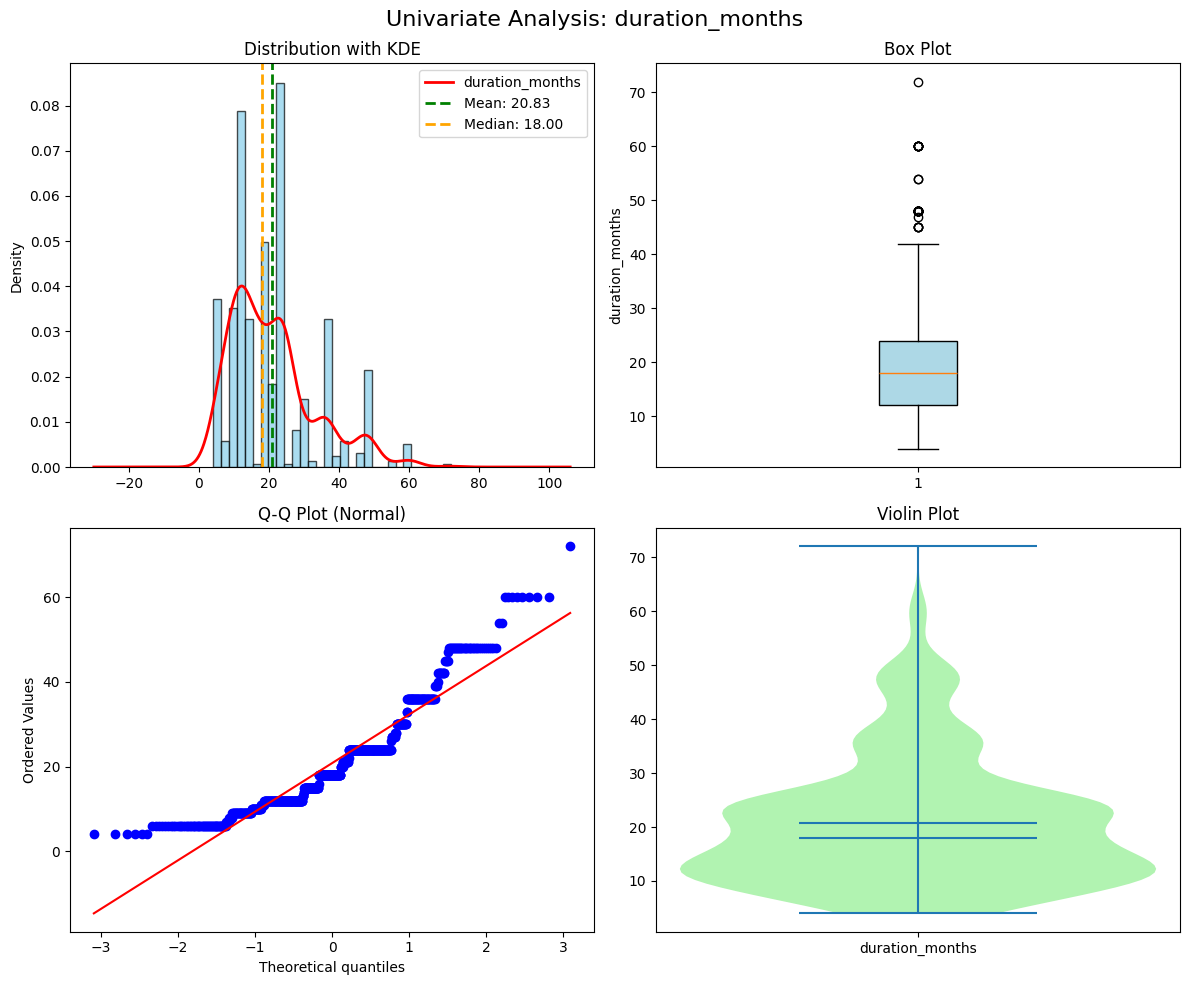

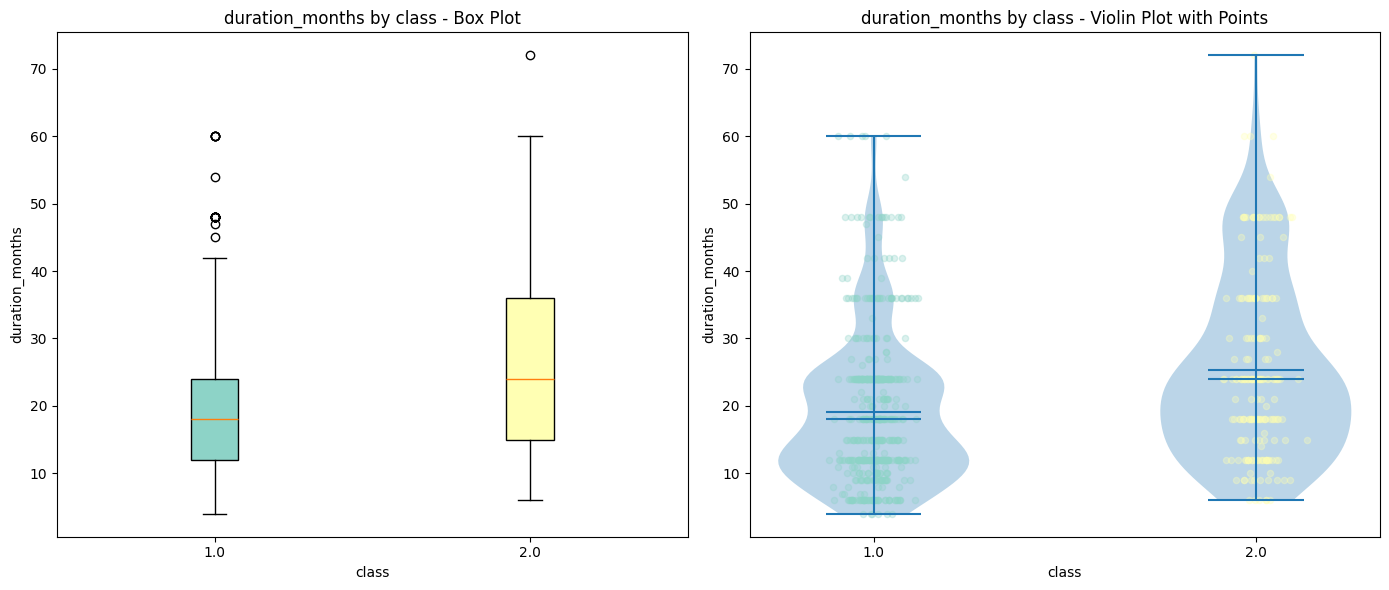

T-TEST: duration_months by class

Descriptive Statistics:

  Group 2.0:
    Mean: 25.29
    Std Dev: 13.28
    Median: 24.00
    N: 197

  Group 1.0:
    Mean: 19.08
    Std Dev: 11.06
    Median: 18.00
    N: 503

T-test Results:
  T-statistic: 5.8208
  P-value: 0.000000
  Cohen's d: 0.530
  Effect size: Medium effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000000). 2.0 has higher mean duration_months than 1.0. Medium effect (Cohen's d = 0.530).
⚠️ Unequal variances detected (Levene's p=0.0043). Welch's t-test was used.
⚠️ Group '2.0' may not be normally distributed (Shapiro p=0.0000).
⚠️ Group '1.0' may not be normally distributed (Shapiro p=0.0000).



Column: credit_amount
count      700.000000
mean      3248.827143
std       2826.996900
min        250.000000
25%       1359.500000
50%       2243.500000
75%       3977.250000
max      18424.000000
Name: credit_amount, dtype: float64


Null values: 0
Null percentage: 0.00%




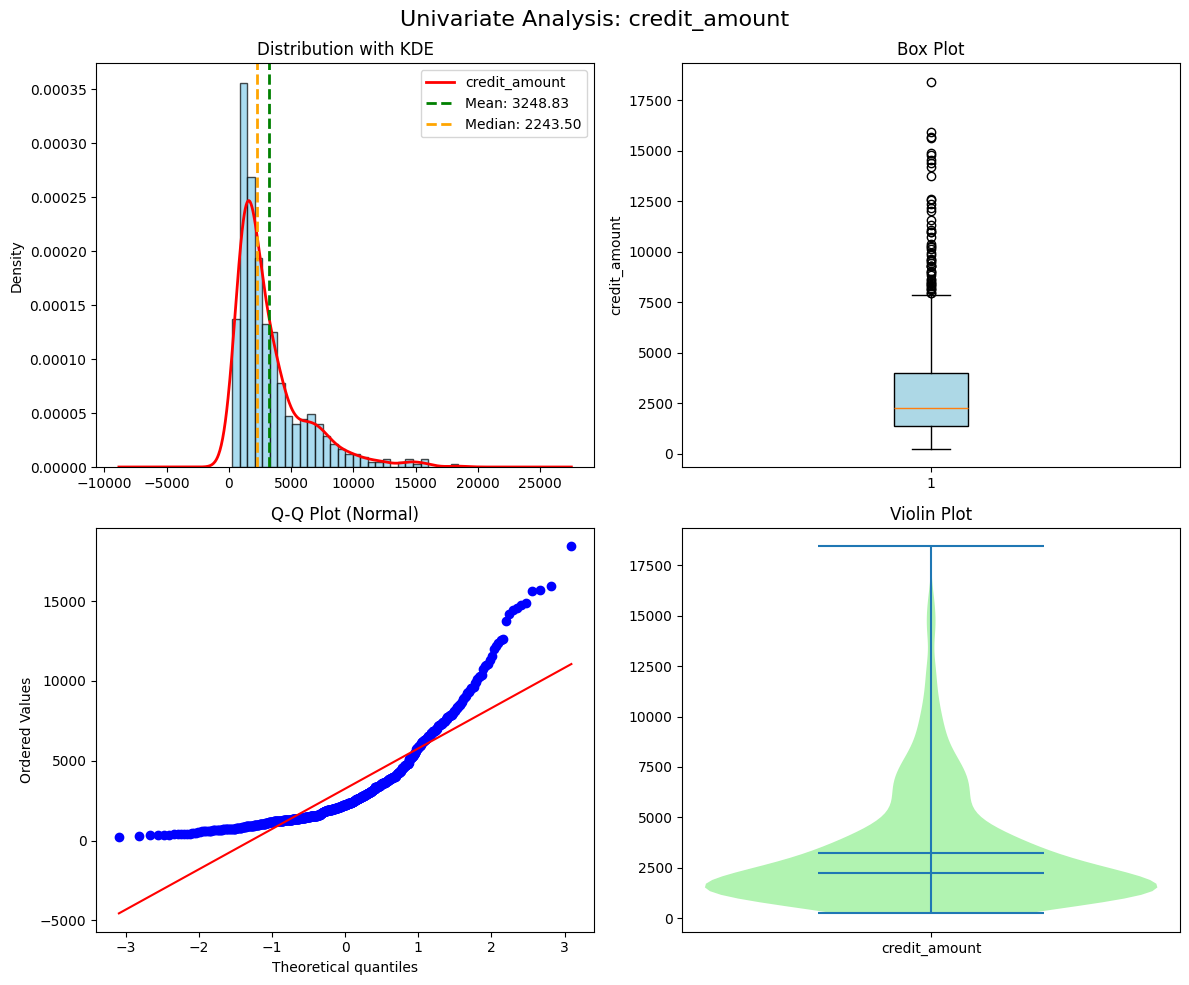

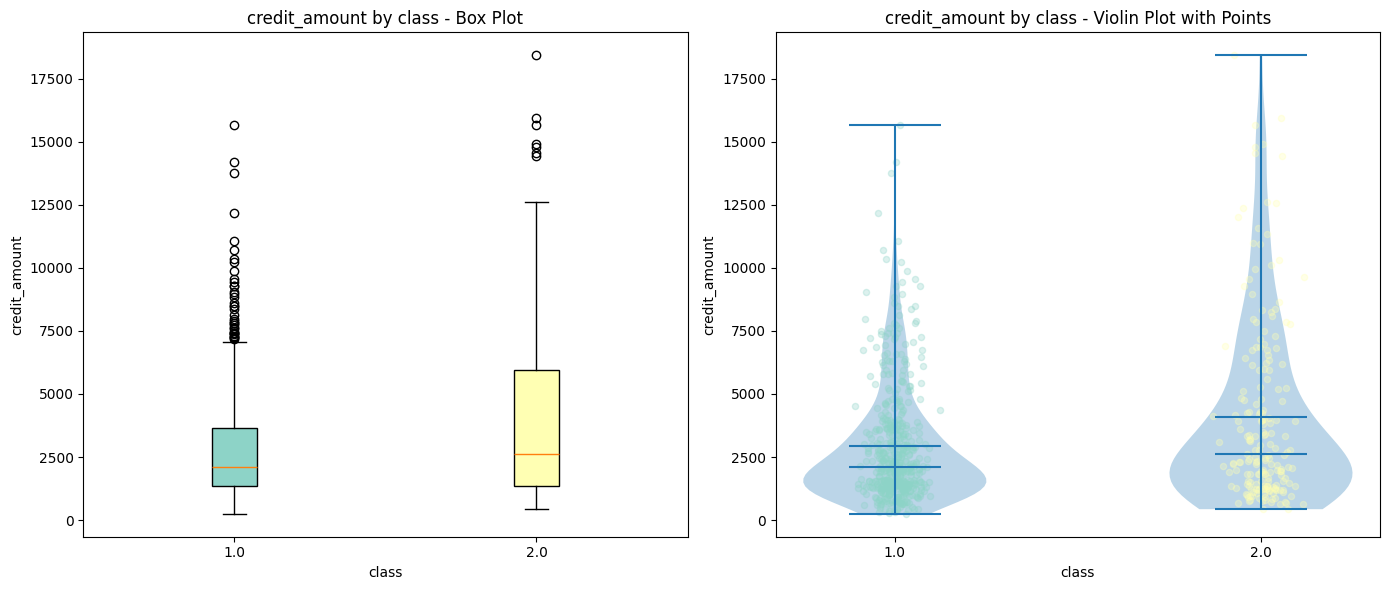

T-TEST: credit_amount by class

Descriptive Statistics:

  Group 2.0:
    Mean: 4094.01
    Std Dev: 3654.26
    Median: 2625.00
    N: 197

  Group 1.0:
    Mean: 2917.81
    Std Dev: 2350.39
    Median: 2121.00
    N: 503

T-test Results:
  T-statistic: 4.1909
  P-value: 0.000038
  Cohen's d: 0.423
  Effect size: Small effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000038). 2.0 has higher mean credit_amount than 1.0. Small effect (Cohen's d = 0.423).
⚠️ Unequal variances detected (Levene's p=0.0000). Welch's t-test was used.
⚠️ Group '2.0' may not be normally distributed (Shapiro p=0.0000).
⚠️ Group '1.0' may not be normally distributed (Shapiro p=0.0000).



Column: installment_rate_pct_of_disp_income
count    700.000000
mean       2.987143
std        1.127675
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: installment_rate_pct_of_disp_income, dtype: float64


Null values: 0
Null p

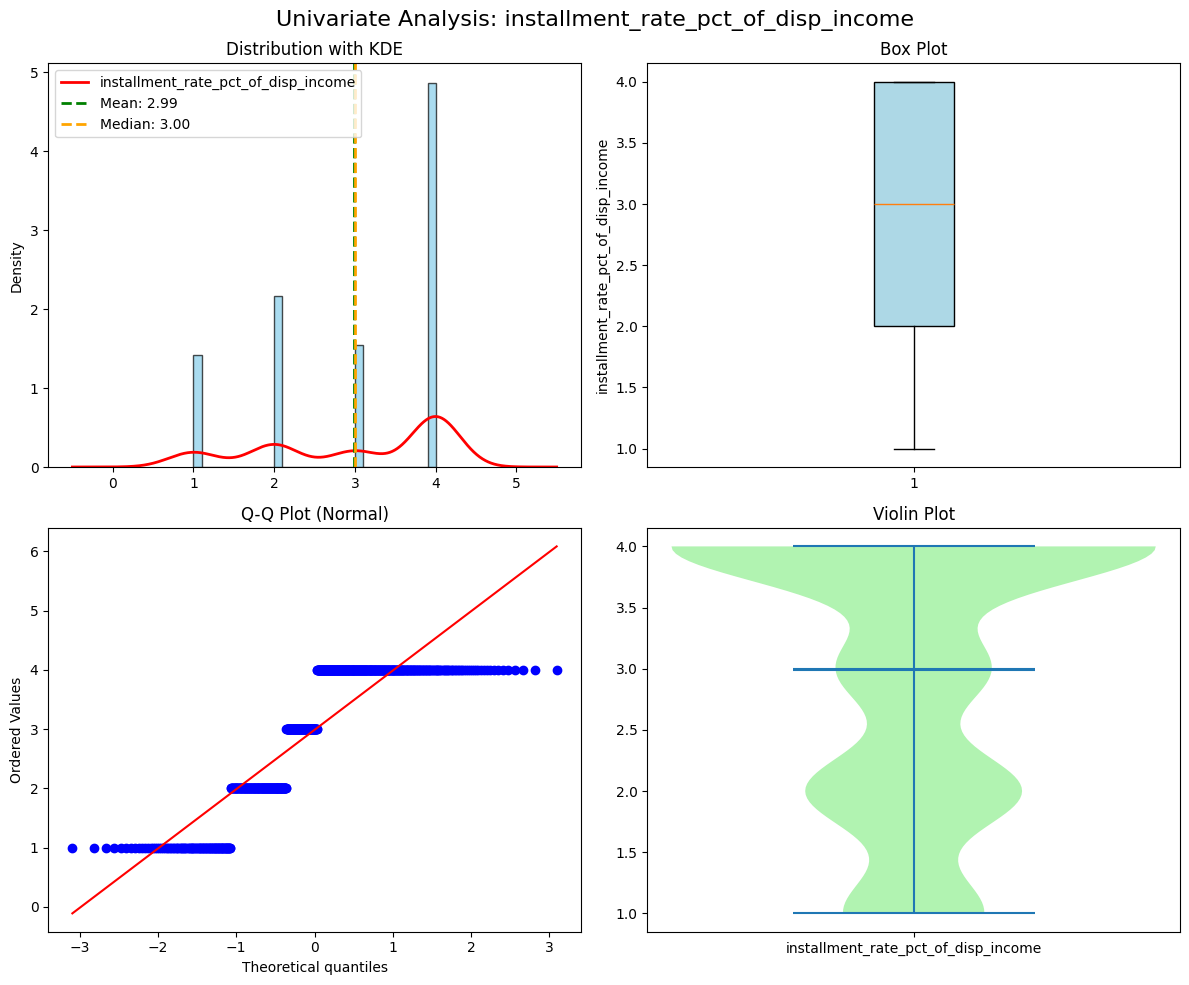

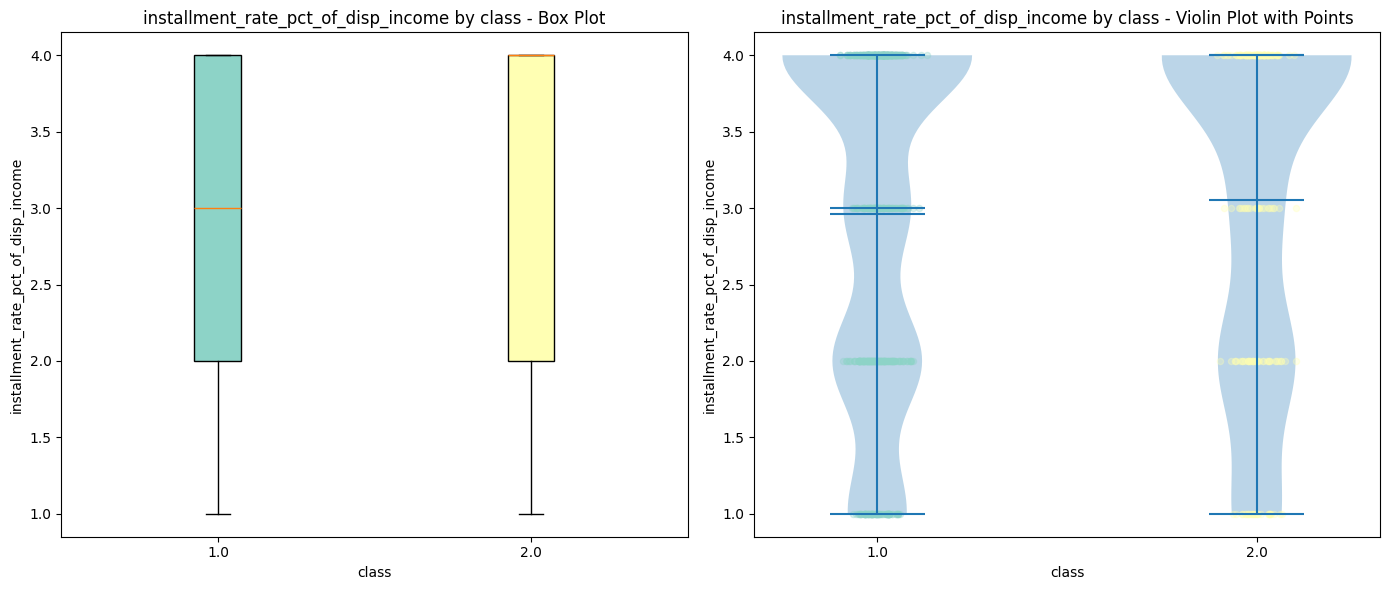

T-TEST: installment_rate_pct_of_disp_income by class

Descriptive Statistics:

  Group 2.0:
    Mean: 3.06
    Std Dev: 1.13
    Median: 4.00
    N: 197

  Group 1.0:
    Mean: 2.96
    Std Dev: 1.13
    Median: 3.00
    N: 503

T-test Results:
  T-statistic: 1.0087
  P-value: 0.313489
  Cohen's d: 0.085
  Effect size: Negligible effect
  Significant at α=0.05: NO

Interpretation:
  NO significant difference (p=0.313489). Mean installment_rate_pct_of_disp_income is similar across groups.
⚠️ Group '2.0' may not be normally distributed (Shapiro p=0.0000).
⚠️ Group '1.0' may not be normally distributed (Shapiro p=0.0000).



Column: present_residence_since
count    700.000000
mean       2.845714
std        1.112639
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: present_residence_since, dtype: float64


Null values: 0
Null percentage: 0.00%




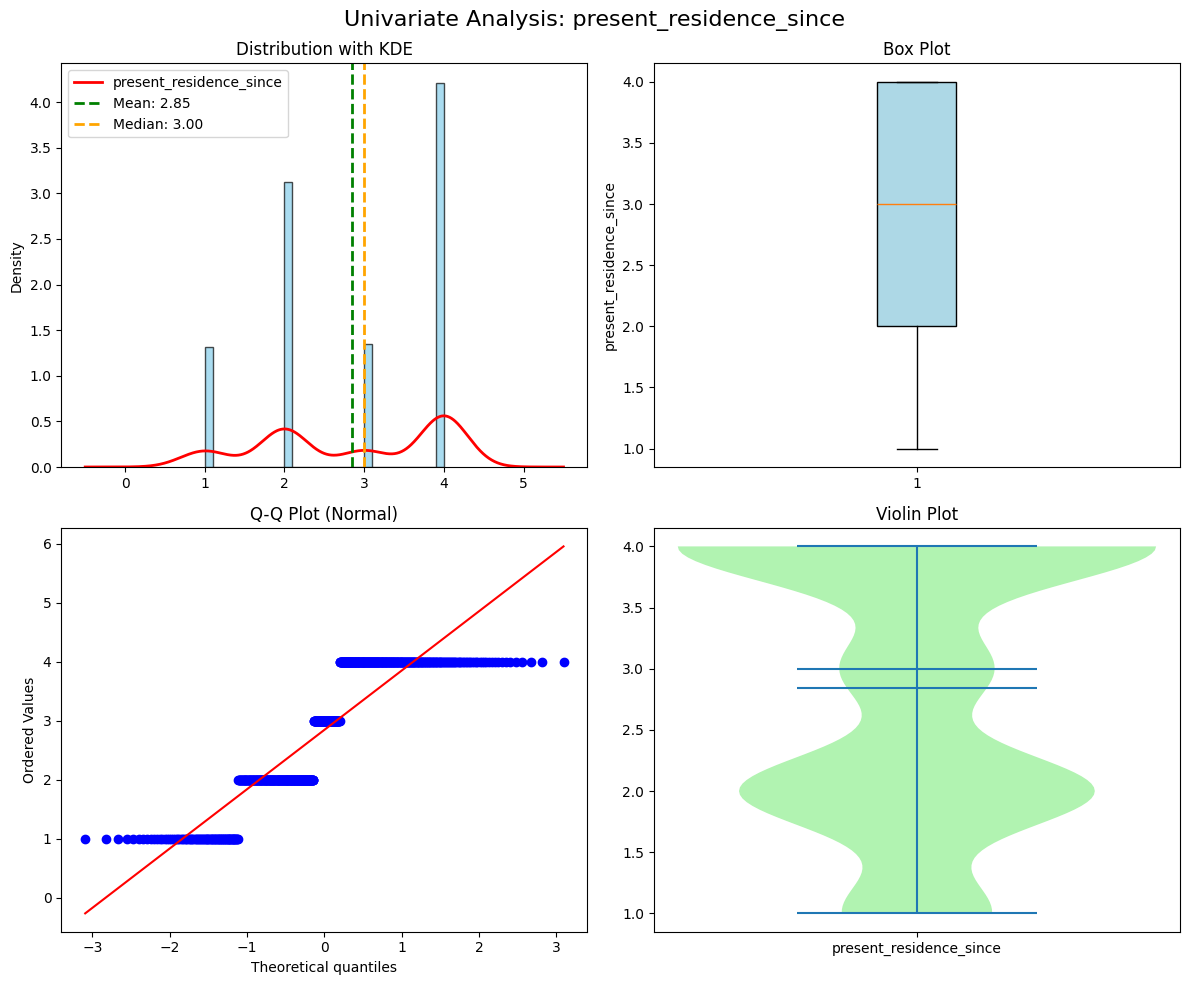

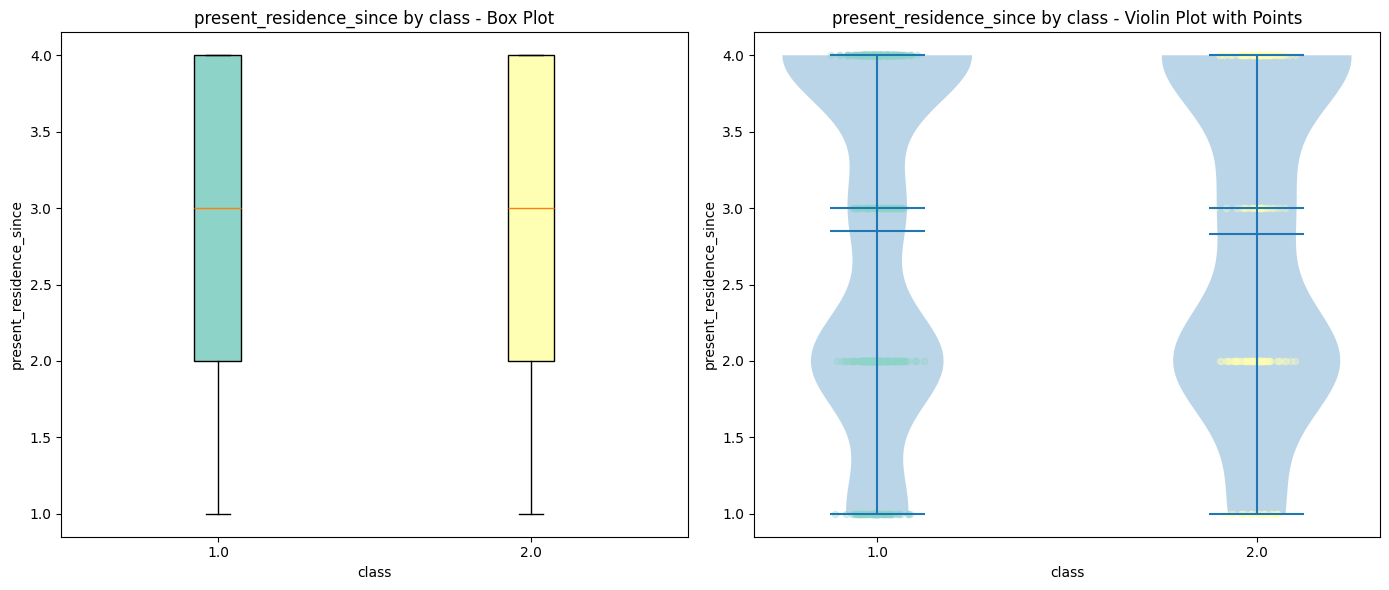

T-TEST: present_residence_since by class

Descriptive Statistics:

  Group 2.0:
    Mean: 2.83
    Std Dev: 1.08
    Median: 3.00
    N: 197

  Group 1.0:
    Mean: 2.85
    Std Dev: 1.13
    Median: 3.00
    N: 503

T-test Results:
  T-statistic: -0.2722
  P-value: 0.785552
  Cohen's d: -0.023
  Effect size: Negligible effect
  Significant at α=0.05: NO

Interpretation:
  NO significant difference (p=0.785552). Mean present_residence_since is similar across groups.
⚠️ Group '2.0' may not be normally distributed (Shapiro p=0.0000).
⚠️ Group '1.0' may not be normally distributed (Shapiro p=0.0000).



Column: age_years
count    700.000000
mean      35.634286
std       11.499852
min       19.000000
25%       26.750000
50%       33.000000
75%       42.250000
max       75.000000
Name: age_years, dtype: float64


Null values: 0
Null percentage: 0.00%




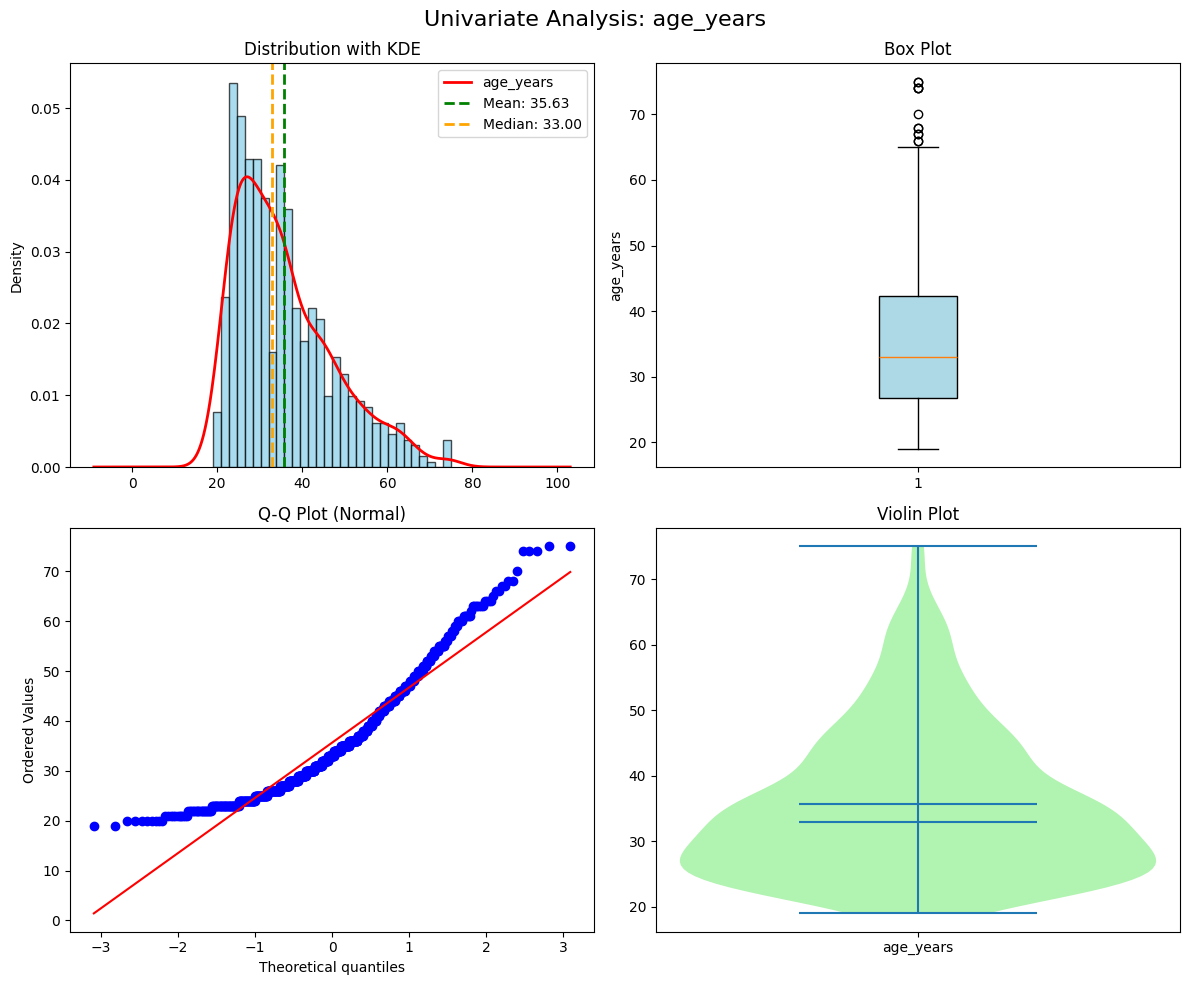

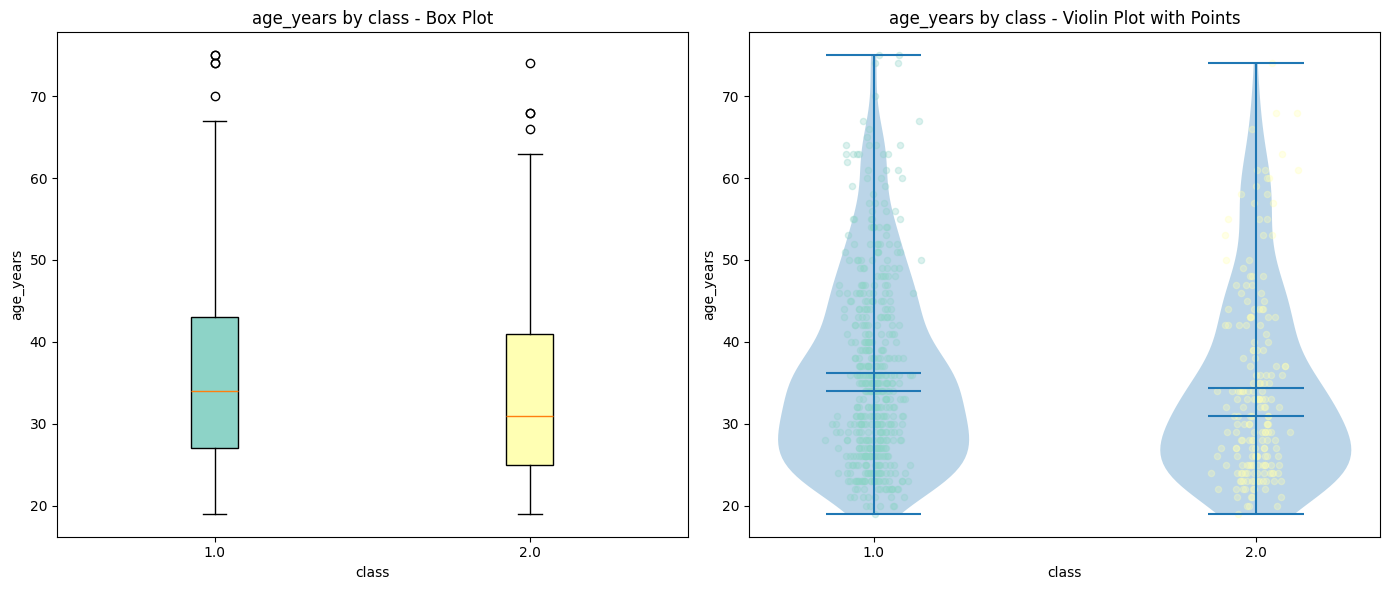

T-TEST: age_years by class

Descriptive Statistics:

  Group 2.0:
    Mean: 34.32
    Std Dev: 11.61
    Median: 31.00
    N: 197

  Group 1.0:
    Mean: 36.15
    Std Dev: 11.43
    Median: 34.00
    N: 503

T-test Results:
  T-statistic: -1.8888
  P-value: 0.059337
  Cohen's d: -0.159
  Effect size: Negligible effect
  Significant at α=0.05: NO

Interpretation:
  NO significant difference (p=0.059337). Mean age_years is similar across groups.
⚠️ Group '2.0' may not be normally distributed (Shapiro p=0.0000).
⚠️ Group '1.0' may not be normally distributed (Shapiro p=0.0000).



Column: existing_credits_count
count    700.000000
mean       1.394286
std        0.577570
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: existing_credits_count, dtype: float64


Null values: 0
Null percentage: 0.00%




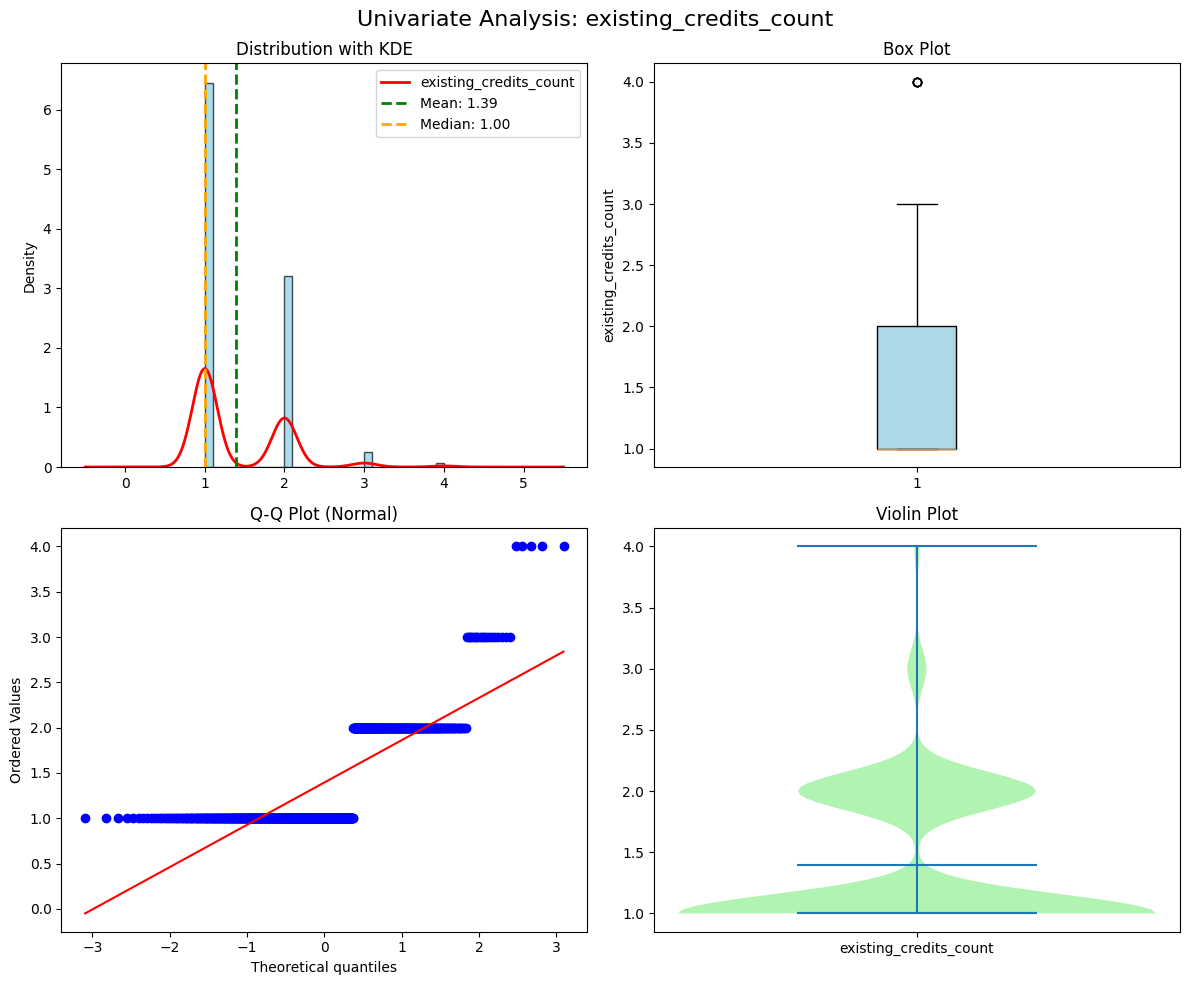

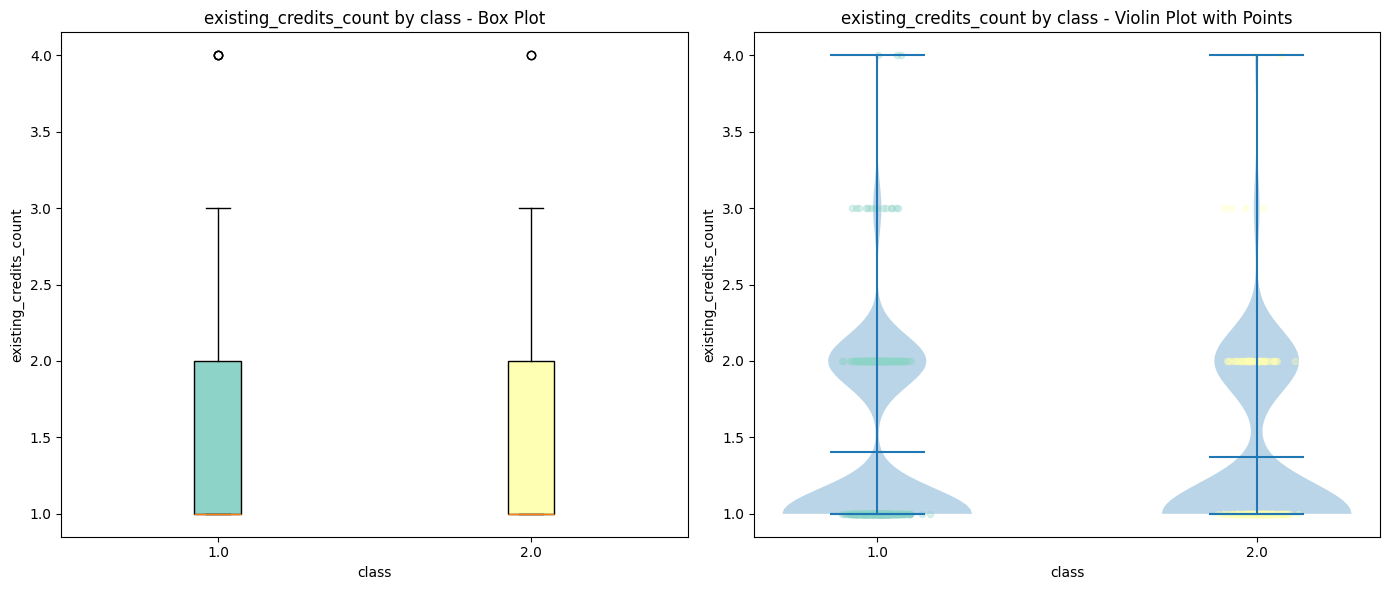

T-TEST: existing_credits_count by class

Descriptive Statistics:

  Group 2.0:
    Mean: 1.37
    Std Dev: 0.58
    Median: 1.00
    N: 197

  Group 1.0:
    Mean: 1.40
    Std Dev: 0.58
    Median: 1.00
    N: 503

T-test Results:
  T-statistic: -0.6799
  P-value: 0.496763
  Cohen's d: -0.057
  Effect size: Negligible effect
  Significant at α=0.05: NO

Interpretation:
  NO significant difference (p=0.496763). Mean existing_credits_count is similar across groups.
⚠️ Group '2.0' may not be normally distributed (Shapiro p=0.0000).
⚠️ Group '1.0' may not be normally distributed (Shapiro p=0.0000).



Column: people_liable_for_maintenance
count    700.000000
mean       1.151429
std        0.358722
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: people_liable_for_maintenance, dtype: float64


Null values: 0
Null percentage: 0.00%




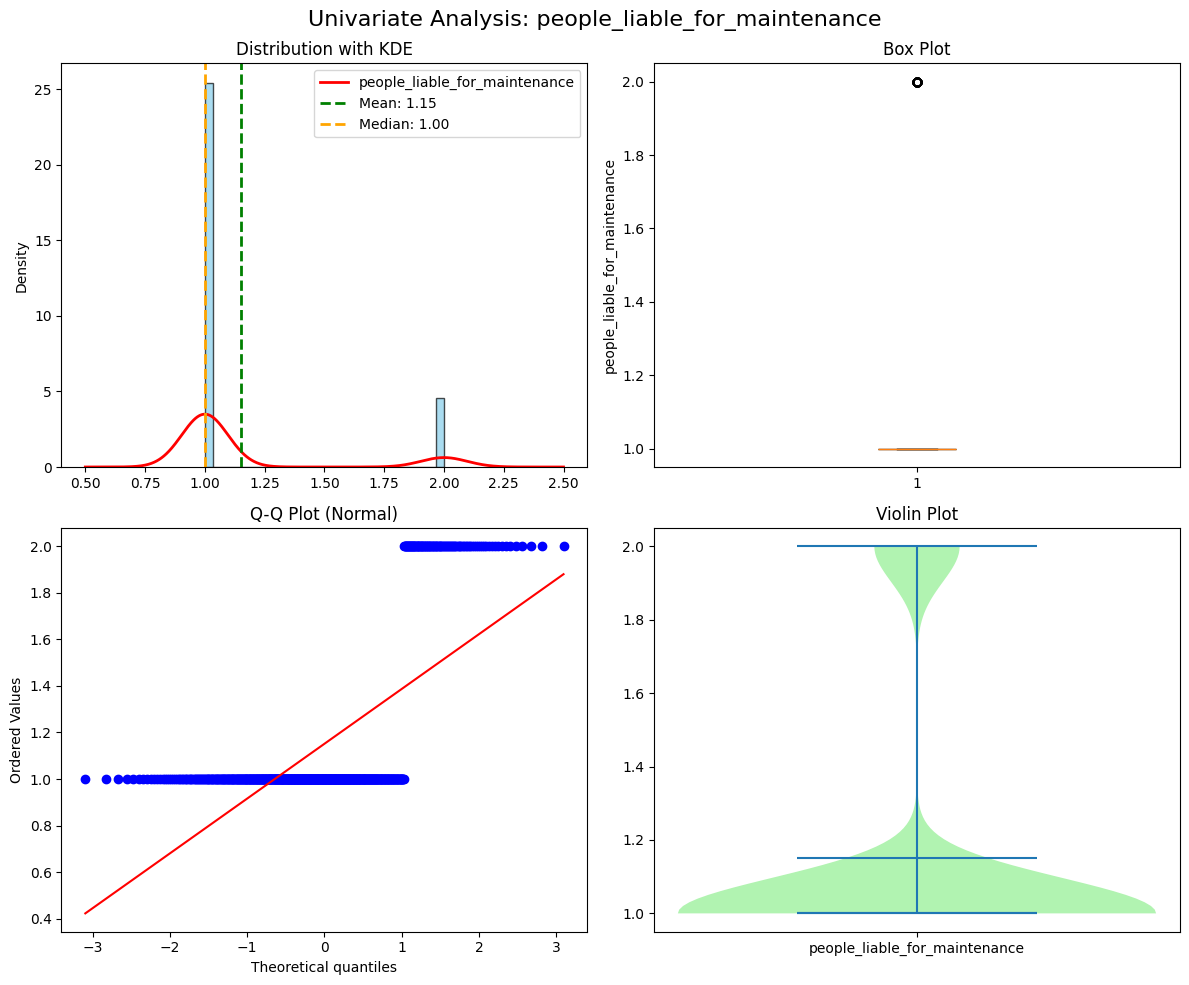

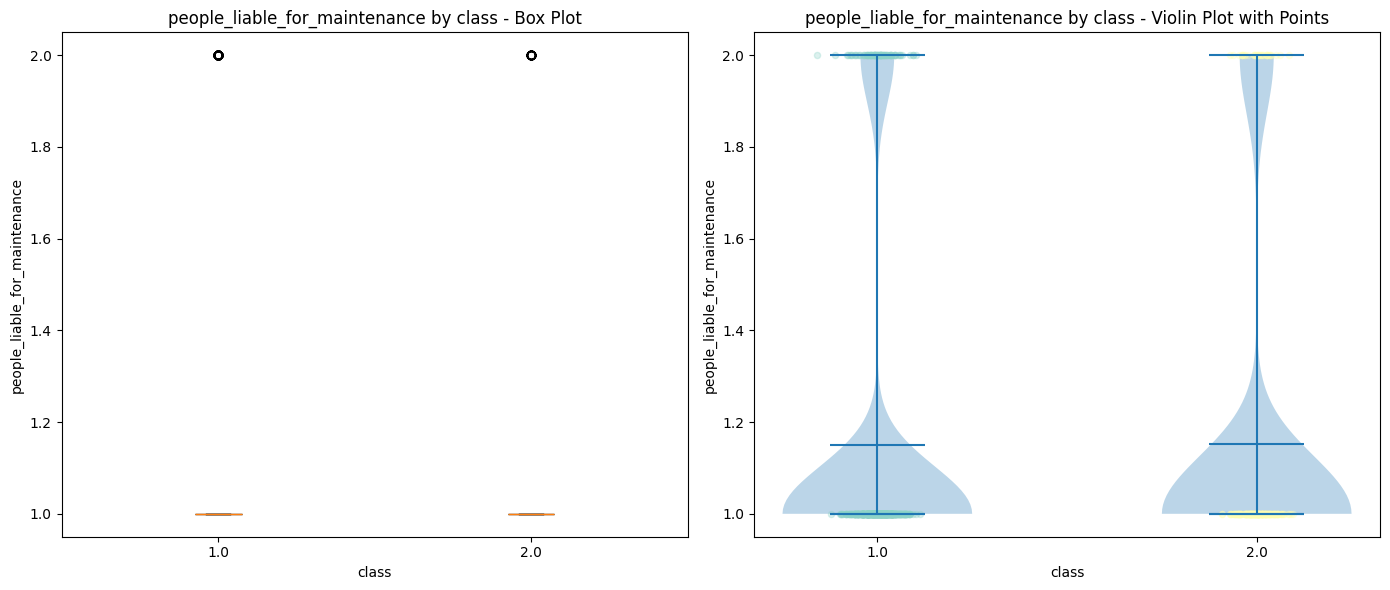

T-TEST: people_liable_for_maintenance by class

Descriptive Statistics:

  Group 2.0:
    Mean: 1.15
    Std Dev: 0.36
    Median: 1.00
    N: 197

  Group 1.0:
    Mean: 1.15
    Std Dev: 0.36
    Median: 1.00
    N: 503

T-test Results:
  T-statistic: 0.0395
  P-value: 0.968528
  Cohen's d: 0.003
  Effect size: Negligible effect
  Significant at α=0.05: NO

Interpretation:
  NO significant difference (p=0.968528). Mean people_liable_for_maintenance is similar across groups.
⚠️ Group '2.0' may not be normally distributed (Shapiro p=0.0000).
⚠️ Group '1.0' may not be normally distributed (Shapiro p=0.0000).





In [51]:
for col in X_train.columns:
    if X_train[col].dtype != 'object':
        
        print(f"Column: {col}")
        print(X_train[col].describe())
        print("\n")
        print(f"Null values: {X_train[col].isnull().sum()}")
        print(f"Null percentage: {X_train[col].isnull().mean():.2%}")
        print("\n")
        
        plot_numeric_univariate(X_train[col], col)
        
        plot_numeric_by_category(col, "class", df[col], y_train)
        
        t_test_results = t_test_numeric_categorical(df[col], y_train)
        
        
        print("=" * 70)
        print(f"T-TEST: {col} by class")
        print("=" * 70)
        print(f"\nDescriptive Statistics:")
        for cat, stats in t_test_results['descriptive_stats'].items():
            print(f"\n  Group {cat}:")
            print(f"    Mean: {stats['mean']:.2f}")
            print(f"    Std Dev: {stats['std']:.2f}")
            print(f"    Median: {stats['median']:.2f}")
            print(f"    N: {stats['n']}")

        print(f"\nT-test Results:")
        print(f"  T-statistic: {t_test_results['t_statistic']:.4f}")
        print(f"  P-value: {t_test_results['p_value']:.6f}")
        print(f"  Cohen's d: {t_test_results['cohens_d']:.3f}")
        print(f"  Effect size: {t_test_results['effect_interpretation']}")
        print(f"  Significant at α=0.05: {'YES' if t_test_results['is_significant'] else 'NO'}")

        print(f"\nInterpretation:")
        print(f"  {t_test_results['interpretation']}")
                
        print("=" * 80)
        print("\n\n")

In [ ]:
# Age works best in combinations
# Try 2-3 high-value interactions

# Interaction 1: Young + High Loan = Risky
X_train['young_high_loan'] = ((X_train['age_years'] < 30) & 
                         (X_train['credit_amount'] > X_train['credit_amount'].median())).astype(int)

young_loan_risk = X_train.groupby('young_high_loan')['target'].apply(lambda x: (x==2).mean()*100)
print(f"\nYoung + High Loan bad rates:")
print(young_loan_risk)

# Interaction 2: Age + Employment Stability
if 'employment_duration' in X_train.columns:
    X_train['unstable_profile'] = ((X_train['age_years'] < 28) & 
                              (X_train['employment_duration'] < 2)).astype(int)

    unstable_risk = X_train.groupby('unstable_profile')['target'].apply(lambda x: (x==2).mean()*100)
    print(f"\nUnstable Profile bad rates:")
    print(unstable_risk)

# Interaction 3: Young + Poor Checking Account
if 'checking_account' in X_train.columns:
    # Assuming A11 = negative balance, A12 = low balance
    X_train['young_poor_banking'] = ((X_train['age_years'] < 30) & 
                                (X_train['checking_account'].isin(['A11', 'A12']))).astype(int)

    young_bank_risk = X_train.groupby('young_poor_banking')['target'].apply(lambda x: (x==2).mean()*100)
    print(f"\nYoung + Poor Banking bad rates:")
    print(young_bank_risk)

# Keep interaction if bad rate difference > 10 percentage points

Binned age p-value: 0.0298
✅ Binning improved signal - use age_tier


/tmp/ipykernel_14517/2055834147.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bad_rates = X_train.groupby('age_tier')['target'].apply(lambda x: (x==2).mean()*100)


KeyError: 'Column not found: target'

In [54]:
df["age_years"].shape, y_train.shape

((1000,), (700,))

<hr>

In [46]:
from scipy.stats import ttest_ind, levene, shapiro, probplot

def t_test_numeric_categorical(numeric_data, categorical_data, alpha=0.05):
    """
    Perform t-test to compare means of a numeric variable across categorical groups.
    
    Parameters:
    -----------
    numeric_data : pd.Series
        Numeric variable data
    categorical_data : pd.Series
        Categorical variable data (should have 2 groups for t-test)
    alpha : float, default=0.05
        Significance level
        
    Returns:
    --------
    dict : Dictionary containing test results
    """
    
    # Get column names from Series
    numeric_col = numeric_data.name if numeric_data.name else 'numeric_variable'
    cat_col = categorical_data.name if categorical_data.name else 'categorical_variable'
    
    # Combine data and remove NaN
    combined_df = pd.DataFrame({numeric_col: numeric_data, cat_col: categorical_data})
    combined_df = combined_df.dropna()
    
    # Get unique categories
    categories = combined_df[cat_col].unique()
    
    if len(categories) != 2:
        return {
            'error': f'T-test requires exactly 2 groups. Found {len(categories)} groups. Use ANOVA for multiple groups.'
        }
    
    # Split data into two groups
    group1 = combined_df[combined_df[cat_col] == categories[0]][numeric_col]
    group2 = combined_df[combined_df[cat_col] == categories[1]][numeric_col]
    
    # Descriptive statistics
    desc_stats = {
        categories[0]: {
            'mean': group1.mean(),
            'std': group1.std(),
            'n': len(group1),
            'median': group1.median()
        },
        categories[1]: {
            'mean': group2.mean(),
            'std': group2.std(),
            'n': len(group2),
            'median': group2.median()
        }
    }
    
    # Test for equal variances (Levene's test)
    levene_stat, levene_p = levene(group1, group2)
    equal_var = levene_p > alpha
    
    # Test for normality (if sample size allows)
    normality_group1 = normality_group2 = None
    if len(group1) >= 3:
        _, normality_group1 = shapiro(group1)
    if len(group2) >= 3:
        _, normality_group2 = shapiro(group2)
    
    # Perform t-test
    t_stat, p_value = ttest_ind(group1, group2, equal_var=equal_var)
    
    # Calculate effect size (Cohen's d)
    pooled_std = np.sqrt(((len(group1)-1)*group1.std()**2 + (len(group2)-1)*group2.std()**2) / 
                         (len(group1) + len(group2) - 2))
    cohens_d = (group1.mean() - group2.mean()) / pooled_std
    
    # Interpret effect size
    if abs(cohens_d) < 0.2:
        effect_interpretation = "Negligible effect"
    elif abs(cohens_d) < 0.5:
        effect_interpretation = "Small effect"
    elif abs(cohens_d) < 0.8:
        effect_interpretation = "Medium effect"
    else:
        effect_interpretation = "Large effect"
    
    # Overall interpretation
    is_significant = p_value < alpha
    if is_significant:
        direction = "higher" if group1.mean() > group2.mean() else "lower"
        interpretation = f"SIGNIFICANT difference detected (p={p_value:.6f}). " \
                        f"{categories[0]} has {direction} mean {numeric_col} than {categories[1]}. " \
                        f"{effect_interpretation} (Cohen's d = {cohens_d:.3f})."
    else:
        interpretation = f"NO significant difference (p={p_value:.6f}). " \
                        f"Mean {numeric_col} is similar across groups."
    
    # Add assumption warnings
    warnings = []
    if not equal_var:
        warnings.append(f"⚠️ Unequal variances detected (Levene's p={levene_p:.4f}). Welch's t-test was used.")
    if normality_group1 is not None and normality_group1 < alpha:
        warnings.append(f"⚠️ Group '{categories[0]}' may not be normally distributed (Shapiro p={normality_group1:.4f}).")
    if normality_group2 is not None and normality_group2 < alpha:
        warnings.append(f"⚠️ Group '{categories[1]}' may not be normally distributed (Shapiro p={normality_group2:.4f}).")
    
    if warnings:
        interpretation += "\n" + "\n".join(warnings)
    
    results = {
        't_statistic': t_stat,
        'p_value': p_value,
        'is_significant': is_significant,
        'cohens_d': cohens_d,
        'effect_interpretation': effect_interpretation,
        'descriptive_stats': desc_stats,
        'equal_variances': equal_var,
        'levene_test': {'statistic': levene_stat, 'p_value': levene_p},
        'interpretation': interpretation,
        'categories': categories,
        'numeric_variable': numeric_col,
        'categorical_variable': cat_col
    }
    
    return results


# Test with credit_amount and class
t_test_results = t_test_numeric_categorical(
    df['credit_amount'], 
    df['class'], 
    
)

print("=" * 70)
print(f"T-TEST: credit_amount by class")
print("=" * 70)
print(f"\nDescriptive Statistics:")
for cat, stats in t_test_results['descriptive_stats'].items():
    print(f"\n  Group {cat}:")
    print(f"    Mean: {stats['mean']:.2f}")
    print(f"    Std Dev: {stats['std']:.2f}")
    print(f"    Median: {stats['median']:.2f}")
    print(f"    N: {stats['n']}")

print(f"\nT-test Results:")
print(f"  T-statistic: {t_test_results['t_statistic']:.4f}")
print(f"  P-value: {t_test_results['p_value']:.6f}")
print(f"  Cohen's d: {t_test_results['cohens_d']:.3f}")
print(f"  Effect size: {t_test_results['effect_interpretation']}")
print(f"  Significant at α=0.05: {'YES' if t_test_results['is_significant'] else 'NO'}")

print(f"\nInterpretation:")
print(f"  {t_test_results['interpretation']}")

T-TEST: credit_amount by class

Descriptive Statistics:

  Group 1:
    Mean: 2985.46
    Std Dev: 2401.47
    Median: 2244.00
    N: 700

  Group 2:
    Mean: 3938.13
    Std Dev: 3535.82
    Median: 2574.50
    N: 300

T-test Results:
  T-statistic: -4.2642
  P-value: 0.000025
  Cohen's d: -0.341
  Effect size: Small effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000025). 1 has lower mean credit_amount than 2. Small effect (Cohen's d = -0.341).
⚠️ Unequal variances detected (Levene's p=0.0000). Welch's t-test was used.
⚠️ Group '1' may not be normally distributed (Shapiro p=0.0000).
⚠️ Group '2' may not be normally distributed (Shapiro p=0.0000).


In [49]:
def plot_numeric_by_category(numeric_col, cat_col, numeric_data, cat_data):
    """
    Create box plots and violin plots comparing numeric variable across categorical groups.
    
    Parameters:
    -----------
    numeric_col : str
        Name of the numeric variable
    cat_col : str
        Name of the categorical variable
    numeric_data : pd.Series
        Numeric variable data
    cat_data : pd.Series
        Categorical variable data
    """
    # Combine data and remove NaN
    combined_df = pd.DataFrame({numeric_col: numeric_data, cat_col: cat_data})
    combined_df = combined_df.dropna()
    
    # Get unique categories and prepare groups
    categories = sorted(combined_df[cat_col].unique())
    groups = [combined_df[combined_df[cat_col] == cat][numeric_col].values for cat in categories]
    
    # Create figure with subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Box plot
    bp = axes[0].boxplot(groups, tick_labels=categories, patch_artist=True)
    colors = sns.color_palette('Set3', len(groups))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    axes[0].set_xlabel(cat_col)
    axes[0].set_ylabel(numeric_col)
    axes[0].set_title(f'{numeric_col} by {cat_col} - Box Plot')
    axes[0].tick_params(axis='x', rotation=0)
    
    # Violin plot with individual points
    parts = axes[1].violinplot(groups, positions=range(len(groups)), 
                              showmeans=True, showmedians=True)
    for i, (group, color) in enumerate(zip(groups, colors)):
        # Add jittered points
        y = group
        x = np.random.normal(i, 0.04, size=len(y))
        axes[1].scatter(x, y, alpha=0.3, s=20, color=color)
    
    axes[1].set_xticks(range(len(groups)))
    axes[1].set_xticklabels(categories)
    axes[1].set_xlabel(cat_col)
    axes[1].set_ylabel(numeric_col)
    axes[1].set_title(f'{numeric_col} by {cat_col} - Violin Plot with Points')
    axes[1].tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.show()

In [40]:
def plot_numeric_univariate(data: pd.Series, column: str):
        """Create comprehensive visualizations for numeric variable."""
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        fig.suptitle(f'Univariate Analysis: {column}', fontsize=16)
        
        # 1. Histogram with KDE
        axes[0, 0].hist(data, bins=30, density=True, alpha=0.7, 
                       color='skyblue', edgecolor='black')
        data.plot.kde(ax=axes[0, 0], color='red', linewidth=2)
        axes[0, 0].axvline(data.mean(), color='green', linestyle='--', 
                          linewidth=2, label=f'Mean: {data.mean():.2f}')
        axes[0, 0].axvline(data.median(), color='orange', linestyle='--', 
                          linewidth=2, label=f'Median: {data.median():.2f}')
        axes[0, 0].set_title('Distribution with KDE')
        axes[0, 0].legend()
        
        # 2. Box plot
        box_data = axes[0, 1].boxplot(data, vert=True, patch_artist=True)
        box_data['boxes'][0].set_facecolor('lightblue')
        axes[0, 1].set_title('Box Plot')
        axes[0, 1].set_ylabel(column)
        
        # 3. Q-Q plot
        probplot(data, dist="norm", plot=axes[1, 0])
        axes[1, 0].set_title('Q-Q Plot (Normal)')
        
        # 4. Violin plot with quartiles
        parts = axes[1, 1].violinplot([data], positions=[1], showmeans=True, 
                                     showextrema=True, showmedians=True)
        for pc in parts['bodies']:
            pc.set_facecolor('lightgreen')
            pc.set_alpha(0.7)
        axes[1, 1].set_title('Violin Plot')
        axes[1, 1].set_xticks([1])
        axes[1, 1].set_xticklabels([column])
        
        plt.tight_layout()
        plt.show()

In [ ]:
def analyze_numeric_categorical(numeric_col: str, cat_col: str, 
                                   show_plots: bool) -> StatisticalTestResult:
        """Analyze relationship between numeric and categorical variables."""
        groups = []
        labels = []
        
        for category in self.df[cat_col].dropna().unique():
            group_data = self.df[self.df[cat_col] == category][numeric_col].dropna()
            if len(group_data) > 0:
                groups.append(group_data)
                labels.append(str(category))
        
        n_groups = len(groups)
        
        if n_groups < 2:
            raise ValueError("Need at least 2 groups for comparison")
        
        # Choose appropriate test
        if n_groups == 2:
            # Two groups - t-test or Mann-Whitney U
            # Check normality
            normal1 = shapiro(groups[0])[1] > self.alpha if len(groups[0]) > 30 else False
            normal2 = shapiro(groups[1])[1] > self.alpha if len(groups[1]) > 30 else False
            
            if normal1 and normal2:
                # Independent t-test
                stat, p_value = ttest_ind(groups[0], groups[1])
                test_name = "Independent t-test"
                
                # Cohen's d effect size
                pooled_std = np.sqrt(((len(groups[0])-1)*groups[0].std()**2 + 
                                    (len(groups[1])-1)*groups[1].std()**2) / 
                                   (len(groups[0]) + len(groups[1]) - 2))
                effect_size = (groups[0].mean() - groups[1].mean()) / pooled_std
            else:
                # Mann-Whitney U test
                stat, p_value = mannwhitneyu(groups[0], groups[1])
                test_name = "Mann-Whitney U test"
                effect_size = stat / (len(groups[0]) * len(groups[1]))
        
        else:
            # Multiple groups - ANOVA or Kruskal-Wallis
            # Check normality for each group
            all_normal = all(shapiro(group)[1] > self.alpha 
                           for group in groups if len(group) > 30)
            
            if all_normal:
                # One-way ANOVA
                stat, p_value = f_oneway(*groups)
                test_name = "One-way ANOVA"
                
                # Eta squared effect size
                grand_mean = np.concatenate(groups).mean()
                ss_between = sum(len(group) * (group.mean() - grand_mean)**2 
                               for group in groups)
                ss_total = sum((val - grand_mean)**2 
                             for group in groups for val in group)
                effect_size = ss_between / ss_total
            else:
                # Kruskal-Wallis test
                stat, p_value = kruskal(*groups)
                test_name = "Kruskal-Wallis test"
                effect_size = (stat - n_groups + 1) / (sum(len(g) for g in groups) - n_groups)
        
        result = StatisticalTestResult(
            test_name=test_name,
            statistic=stat,
            p_value=p_value,
            effect_size=effect_size,
            interpretation=self._interpret_group_comparison(p_value, effect_size)
        )
        
        if show_plots:
            self._plot_numeric_categorical(groups, labels, numeric_col, cat_col)
        
        return result

In [ ]:
def distribution_comparison(df: pd.DataFrame, columns: List[str], 
                          group_col: str = None) -> None:
    """
    Compare distributions of multiple columns, optionally by groups.
    
    Args:
        df: Input DataFrame
        columns: List of numeric columns to compare
        group_col: Optional grouping column
    """
    n_cols = len(columns)
    
    if group_col is None:
        # Compare distributions of different columns
        fig, axes = plt.subplots(2, n_cols, figsize=(5*n_cols, 8))
        
        for i, col in enumerate(columns):
            data = df[col].dropna()
            
            # Histogram
            axes[0, i].hist(data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
            axes[0, i].set_title(f'{col} Distribution')
            axes[0, i].set_xlabel(col)
            axes[0, i].set_ylabel('Frequency')
            
            # Box plot
            axes[1, i].boxplot(data, vert=True, patch_artist=True,
                             boxprops=dict(facecolor='lightgreen'))
            axes[1, i].set_ylabel(col)
            axes[1, i].set_title(f'{col} Box Plot')
    else:
        # Compare distributions by groups
        groups = df[group_col].dropna().unique()
        n_groups = len(groups)
        
        fig, axes = plt.subplots(n_cols, 2, figsize=(12, 4*n_cols))
        if n_cols == 1:
            axes = axes.reshape(1, -1)
        
        for i, col in enumerate(columns):
            # Density plots by group
            for group in groups:
                group_data = df[df[group_col] == group][col].dropna()
                if len(group_data) > 0:
                    group_data.plot.kde(ax=axes[i, 0], label=str(group), alpha=0.7)
            
            axes[i, 0].set_title(f'{col} Distribution by {group_col}')
            axes[i, 0].set_xlabel(col)
            axes[i, 0].legend()
            
            # Box plots by group
            group_data_list = [df[df[group_col] == g][col].dropna() for g in groups]
            bp = axes[i, 1].boxplot(group_data_list, labels=groups, patch_artist=True)
            
            colors = sns.color_palette('Set2', n_groups)
            for patch, color in zip(bp['boxes'], colors):
                patch.set_facecolor(color)
            
            axes[i, 1].set_title(f'{col} by {group_col}')
            axes[i, 1].set_xlabel(group_col)
            axes[i, 1].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()


In [ ]:
def quick_correlation_matrix(df: pd.DataFrame, 
                           method: str = 'pearson',
                           min_periods: int = 30) -> pd.DataFrame:
    """
    Create correlation matrix with significance testing.
    
    Args:
        df: DataFrame with numeric columns
        method: 'pearson', 'spearman', or 'kendall'
        min_periods: Minimum number of observations required
        
    Returns:
        Correlation matrix
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    corr_matrix = df[numeric_cols].corr(method=method, min_periods=min_periods)
    
    # Create significance matrix
    p_matrix = pd.DataFrame(np.zeros_like(corr_matrix), 
                          index=corr_matrix.index, 
                          columns=corr_matrix.columns)
    
    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            col1, col2 = numeric_cols[i], numeric_cols[j]
            data1 = df[col1].dropna()
            data2 = df[col2].dropna()
            
            # Find common indices
            common_idx = data1.index.intersection(data2.index)
            if len(common_idx) >= min_periods:
                if method == 'pearson':
                    _, p_val = pearsonr(data1[common_idx], data2[common_idx])
                else:
                    _, p_val = spearmanr(data1[common_idx], data2[common_idx])
                
                p_matrix.loc[col1, col2] = p_val
                p_matrix.loc[col2, col1] = p_val
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    # Correlation heatmap
    mask = np.triu(np.ones_like(corr_matrix), k=1)
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
               cmap='coolwarm', center=0, ax=axes[0],
               cbar_kws={'label': f'{method.capitalize()} Correlation'})
    axes[0].set_title(f'{method.capitalize()} Correlation Matrix')
    
    # Significance heatmap
    sig_matrix = p_matrix < 0.05
    sns.heatmap(sig_matrix, mask=mask, cmap='RdYlGn', center=0.5, 
               ax=axes[1], cbar_kws={'label': 'Significant (p < 0.05)'})
    axes[1].set_title('Statistical Significance')
    
    plt.tight_layout()
    plt.show()
    
    return corr_matrix

SyntaxError: invalid syntax (1178745721.py, line 1)

In [7]:

from scipy.stats import chi2_contingency
from scipy.stats import chi2


def chi_square_test_credit(categorical_var, target_var, alpha=0.05):
    """
    Performs Chi-Square test of independence between a categorical variable and credit target.
    
    Parameters:
    -----------
    categorical_var : array-like
        Categorical predictor variable (e.g., checking account status)
    target_var : array-like  
        Credit target variable (1=Good Credit, 2=Bad Credit)
    alpha : float, default=0.05
        Significance level for hypothesis testing
    
    Returns:
    --------
    dict : Dictionary containing test results
    """
    
    # Create contingency table
    contingency_table = pd.crosstab(categorical_var, target_var)
    
    # Perform chi-square test
    chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)
    
    # Calculate critical value
    critical_value = chi2.ppf(1 - alpha, dof)
    
    # Determine significance
    is_significant = p_value < alpha
    
    # Check assumptions (expected frequency >= 5)
    min_expected = expected_freq.min()
    assumption_met = min_expected >= 5
    
    # Create interpretation
    if is_significant:
        strength = "strong" if chi2_stat > critical_value * 2 else "moderate"
        interpretation = f"SIGNIFICANT relationship detected (p={p_value:.6f}). " \
                        f"The categorical variable shows {strength} association with credit quality."
    else:
        interpretation = f"NO significant relationship (p={p_value:.6f}). " \
                        f"Variables appear independent."
    
    # Add assumption warning
    if not assumption_met:
        interpretation += f"\n⚠️  WARNING: Minimum expected frequency = {min_expected:.2f} < 5. " \
                         f"Chi-square test may be unreliable."
    
    results = {
        'chi2_statistic': chi2_stat,
        'p_value': p_value,
        'degrees_freedom': dof,
        'critical_value': critical_value,
        'is_significant': is_significant,
        'contingency_table': contingency_table,
        'expected_frequencies': expected_freq,
        'min_expected_freq': min_expected,
        'assumption_met': assumption_met,
        'interpretation': interpretation
    }
    
    return results


def cramers_v_credit(categorical_var, target_var, bias_correction=True):
    """
    Calculates Cramér's V - measure of association strength between categorical variables.
    
    Parameters:
    -----------
    categorical_var : array-like
        Categorical predictor variable
    target_var : array-like
        Credit target variable (1=Good Credit, 2=Bad Credit)
    bias_correction : bool, default=True
        Apply bias correction for small samples
    
    Returns:
    --------
    dict : Dictionary containing Cramér's V results
    """
    
    # Create contingency table  
    contingency_table = pd.crosstab(categorical_var, target_var)
    
    # Get table dimensions
    n = contingency_table.sum().sum()  # Total observations
    r, c = contingency_table.shape     # Rows, columns
    
    # Calculate chi-square statistic
    chi2_stat, _, _, _ = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V
    cramers_v_raw = np.sqrt(chi2_stat / (n * min(r-1, c-1)))
    
    # Apply bias correction for small samples (Bergsma & Wicher, 2013)
    if bias_correction and n > 0:
        # Bias correction formula
        phi_corrected = max(0, (chi2_stat/n) - ((r-1)*(c-1)/(n-1)))
        r_corrected = r - ((r-1)**2/(n-1))
        c_corrected = c - ((c-1)**2/(n-1))
        
        if min(r_corrected-1, c_corrected-1) > 0:
            cramers_v_corrected = np.sqrt(phi_corrected / min(r_corrected-1, c_corrected-1))
        else:
            cramers_v_corrected = cramers_v_raw
            
        cramers_v_corrected = min(1.0, cramers_v_corrected)  # Cap at 1.0
    else:
        cramers_v_corrected = cramers_v_raw
    
    # Interpret strength (Credit Risk Industry Standards)
    def interpret_strength(v):
        if v < 0.1:
            return "Negligible association (< 0.1) - Weak predictor"
        elif v < 0.2:
            return "Small association (0.1-0.2) - Moderate predictor" 
        elif v < 0.3:
            return "Medium association (0.2-0.3) - Good predictor"
        elif v < 0.4:
            return "Large association (0.3-0.4) - Strong predictor"
        else:
            return "Very large association (≥ 0.4) - Excellent predictor"
    
    strength_interpretation = interpret_strength(cramers_v_corrected)
    
    results = {
        'cramers_v': cramers_v_raw,
        'cramers_v_corrected': cramers_v_corrected,
        'strength_interpretation': strength_interpretation,
        'n_observations': n,
        'table_dimensions': (r, c),
        'contingency_table': contingency_table,
        'chi2_statistic': chi2_stat
    }
    
    return results


def analyze_credit_variable(df, cat_variable, target_variable, print_results=True):
    """
    Comprehensive analysis of categorical variable vs credit quality target.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing the variables
    cat_variable : str
        Name of categorical variable column
    target_variable : str  
        Name of credit target variable column (1=Good, 2=Bad)
    print_results : bool, default=True
        Whether to print formatted results
    
    Returns:
    --------
    dict : Complete analysis results
    """
    
    # Extract variables
    cat_var = df[cat_variable]
    target_var = target_variable
    
    # Run both tests
    chi2_results = chi_square_test_credit(cat_var, target_var)
    cramers_results = cramers_v_credit(cat_var, target_var)
    
    # Calculate credit quality rates by category
    credit_rates = pd.crosstab(cat_var, target_var, normalize='index')
    
    # Calculate bad credit rates (proportion of 2s)
    bad_credit_rates = {}
    good_credit_rates = {}
    
    for category in credit_rates.index:
        if 2 in credit_rates.columns:  # If bad credit exists
            bad_credit_rates[category] = credit_rates.loc[category, 2] * 100
        else:
            bad_credit_rates[category] = 0.0
            
        if 1 in credit_rates.columns:  # If good credit exists
            good_credit_rates[category] = credit_rates.loc[category, 1] * 100
        else:
            good_credit_rates[category] = 0.0
    
    if print_results:
        print("=" * 70)
        print(f"CREDIT RISK VARIABLE ANALYSIS: {cat_variable}")
        print("=" * 70)
        
        print("\n📊 CONTINGENCY TABLE (Rows=Categories, Cols=Credit Quality):")
        print("   1=Good Credit, 2=Bad Credit")
        print(chi2_results['contingency_table'])
        
        print(f"\n📈 BAD CREDIT RATES BY CATEGORY:")
        for category in sorted(bad_credit_rates.keys()):
            bad_rate = bad_credit_rates[category]
            good_rate = good_credit_rates[category]
            print(f"   {category}: {bad_rate:.1f}% bad credit | {good_rate:.1f}% good credit")
        
        print(f"\n🔍 CHI-SQUARE TEST RESULTS:")
        print(f"   Chi-square statistic: {chi2_results['chi2_statistic']:.4f}")
        print(f"   P-value: {chi2_results['p_value']:.6f}")
        print(f"   Degrees of freedom: {chi2_results['degrees_freedom']}")
        print(f"   Significant at α=0.05: {'YES' if chi2_results['is_significant'] else 'NO'}")
        
        print(f"\n💪 CRAMÉR'S V RESULTS:")
        print(f"   Cramér's V: {cramers_results['cramers_v']:.4f}")
        print(f"   Bias-corrected V: {cramers_results['cramers_v_corrected']:.4f}")
        print(f"   Strength: {cramers_results['strength_interpretation']}")
        
        print(f"\n📋 CREDIT RISK INTERPRETATION:")
        print(f"   {chi2_results['interpretation']}")
        
        # Risk ranking suggestion
        print(f"\n🎯 RISK RANKING ANALYSIS:")
        sorted_categories = sorted(bad_credit_rates.items(), key=lambda x: x[1], reverse=True)
        print(f"   Categories ranked by bad credit rate (highest to lowest risk):")
        for i, (category, rate) in enumerate(sorted_categories, 1):
            print(f"   {i}. {category}: {rate:.1f}% bad credit rate")
        
    # Combine results
    combined_results = {
        'chi_square': chi2_results,
        'cramers_v': cramers_results,
        'credit_rates': credit_rates,
        'bad_credit_rates': bad_credit_rates,
        'good_credit_rates': good_credit_rates,
        'variable_name': cat_variable
    }
    
    return combined_results


# Example usage for German Credit Dataset:
"""
# Load your data
df = pd.read_csv('german_credit.csv')

# Analyze checking account status (Attribute 1)
# Assuming your target column is named 'target' and checking account is 'checking_account'
results = analyze_credit_variable(df, 'checking_account', 'target')

# Quick analysis for model inclusion decision
cramers_v_score = results['cramers_v']['cramers_v_corrected']
if cramers_v_score >= 0.15:
    print("✅ Strong predictor - Include in model")
elif cramers_v_score >= 0.10:
    print("⚠️  Moderate predictor - Consider including")
else:
    print("❌ Weak predictor - Consider excluding")

# Expected pattern for checking account status:
# A11 (< 0 DM) should have HIGHEST bad credit rate
# A14 (no account) should have HIGH bad credit rate  
# A12 (0-200 DM) should have MODERATE bad credit rate
# A13 (≥200 DM) should have LOWEST bad credit rate
"""

'\n# Load your data\ndf = pd.read_csv(\'german_credit.csv\')\n\n# Analyze checking account status (Attribute 1)\n# Assuming your target column is named \'target\' and checking account is \'checking_account\'\nresults = analyze_credit_variable(df, \'checking_account\', \'target\')\n\n# Quick analysis for model inclusion decision\ncramers_v_score = results[\'cramers_v\'][\'cramers_v_corrected\']\nif cramers_v_score >= 0.15:\n    print("✅ Strong predictor - Include in model")\nelif cramers_v_score >= 0.10:\n    print("⚠️  Moderate predictor - Consider including")\nelse:\n    print("❌ Weak predictor - Consider excluding")\n\n# Expected pattern for checking account status:\n# A11 (< 0 DM) should have HIGHEST bad credit rate\n# A14 (no account) should have HIGH bad credit rate  \n# A12 (0-200 DM) should have MODERATE bad credit rate\n# A13 (≥200 DM) should have LOWEST bad credit rate\n'

In [10]:
# Analyze credit history (Attribute 1)
results = analyze_credit_variable(X_train, 'savings_account_bonds', y_train)


CREDIT RISK VARIABLE ANALYSIS: savings_account_bonds

📊 CONTINGENCY TABLE (Rows=Categories, Cols=Credit Quality):
   1=Good Credit, 2=Bad Credit
class                         1    2
savings_account_bonds               
100 <= ... < 500 DM          48   21
500 <= ... < 1000 DM         36    5
< 100 DM                    281  146
>= 1000 DM                   30    5
unknown/no savings account  108   20

📈 BAD CREDIT RATES BY CATEGORY:
   100 <= ... < 500 DM: 30.4% bad credit | 69.6% good credit
   500 <= ... < 1000 DM: 12.2% bad credit | 87.8% good credit
   < 100 DM: 34.2% bad credit | 65.8% good credit
   >= 1000 DM: 14.3% bad credit | 85.7% good credit
   unknown/no savings account: 15.6% bad credit | 84.4% good credit

🔍 CHI-SQUARE TEST RESULTS:
   Chi-square statistic: 26.3036
   P-value: 0.000027
   Degrees of freedom: 4
   Significant at α=0.05: YES

💪 CRAMÉR'S V RESULTS:
   Cramér's V: 0.1938
   Bias-corrected V: 0.1786
   Strength: Small association (0.1-0.2) - Moderate predicto

In [ ]:

# Quick analysis without printing
chi2_res = chi_square_test_credit(X_train['credit_history'], y_train)
cramers_res = cramers_v_credit(X_train['credit_history'], y_train)

print(f"Cramér's V: {cramers_res['cramers_v_corrected']:.4f}")
print(f"P-value: {chi2_res['p_value']:.6f}")